<a href="https://colab.research.google.com/github/silva-felipe/BootCamp_Alura_DataScience/blob/main/notebooks/modulo3/Bootcamp(modulo3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # importando pandas

import seaborn as sns # importando seaborn

# importando matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

# importando datetime
# from datetime import datetime
# from datetime import date

import numpy as np # importando numpy
 
from scipy.signal import find_peaks # importando scipy
from scipy import stats

# importando warnings
import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet # importing prophet

# Aula 01 - Coleta de dados e primeiras análises

In [2]:
url = 'https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv'

In [3]:
dados = pd.read_csv(url, sep=';',thousands='.',decimal=',')
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21.6820  -51.0737              9
1            Adolfo      3500204   25  ...  -21.2325  -49.6451              9
2             Aguaí      3500303   25  ...  -22.0572  -46.9735              9
3    Águas da Prata      3500402   25  ...  -21.9319  -46.7176              9
4  Águas de Lindóia      3500501   25  ...  -22.4733  -46.6314              9

[5 rows x 26 columns]

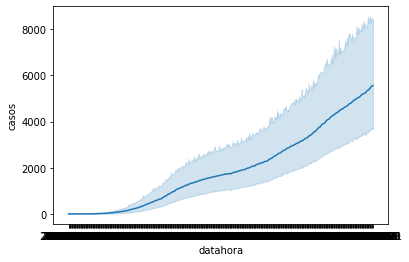

In [4]:
sns.lineplot(x='datahora', y='casos', data=dados)

**Transformando a coluna datahora num objeto datetime**

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

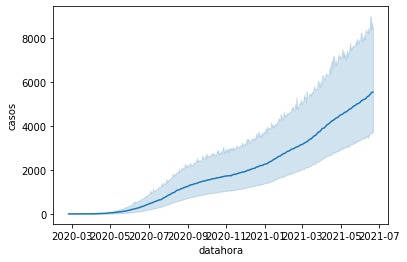

In [6]:
sns.lineplot(x='datahora', y='casos', data=dados)

**utilizando o matplotlib para configurar as figuras**

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

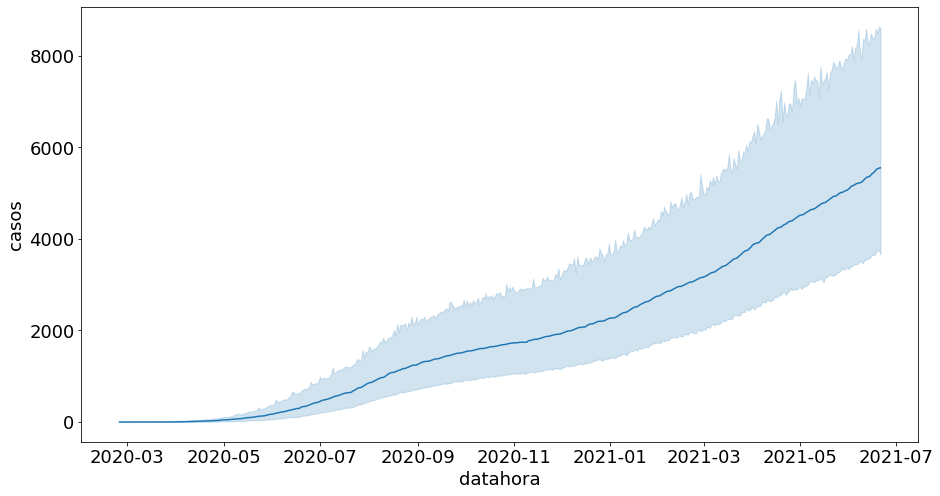

In [8]:
sns.lineplot(x='datahora', y='casos', data=dados)

**exponencial** $$e^x$$

In [9]:
eixo_x = np.linspace(-2,2,100)

In [10]:
y_exp = np.exp(eixo_x)

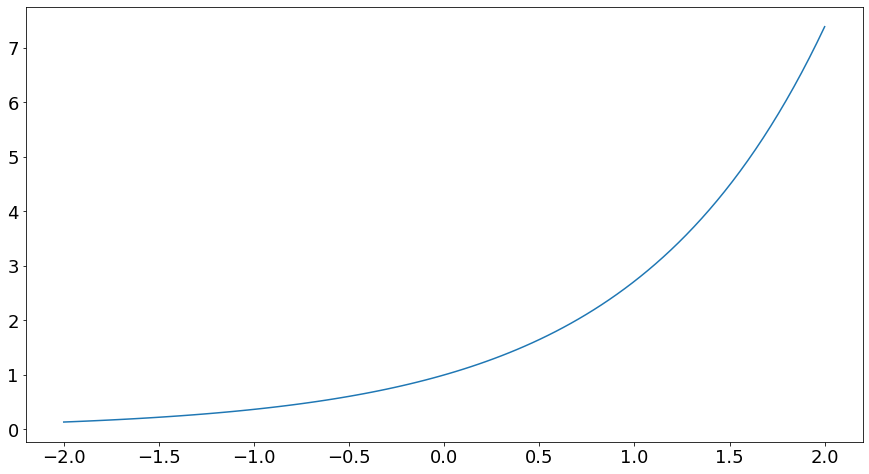

In [11]:
sns.lineplot(x=eixo_x, y=y_exp)

$$ log_2 2 = 1$$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

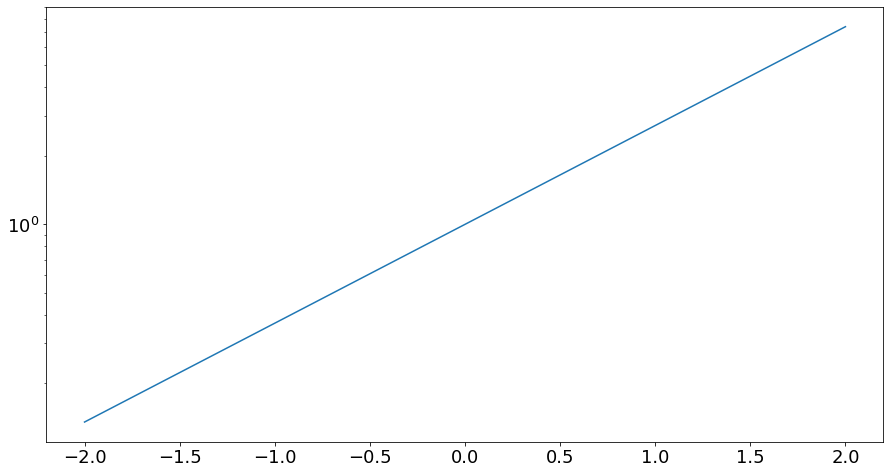

In [12]:
sns.lineplot(x=eixo_x, y=y_exp)
plt.yscale('log')

**Dados sp**

In [13]:
dados_sp = dados.query('nome_munic == "São Paulo"')
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
562   São Paulo      3550308   25  ...  -23.5329  -46.6395              9
1207  São Paulo      3550308   26  ...  -23.5329  -46.6395              9
1852  São Paulo      3550308   27  ...  -23.5329  -46.6395              9
2497  São Paulo      3550308   28  ...  -23.5329  -46.6395              9
3142  São Paulo      3550308   29  ...  -23.5329  -46.6395              9

[5 rows x 26 columns]

*resetando o index de dados_sp*

In [14]:
dados_sp.reset_index(inplace=True)
dados_sp.drop('index', axis=1, inplace=True)
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0  São Paulo      3550308   25  ...  -23.5329  -46.6395              9
1  São Paulo      3550308   26  ...  -23.5329  -46.6395              9
2  São Paulo      3550308   27  ...  -23.5329  -46.6395              9
3  São Paulo      3550308   28  ...  -23.5329  -46.6395              9
4  São Paulo      3550308   29  ...  -23.5329  -46.6395              9

[5 rows x 26 columns]

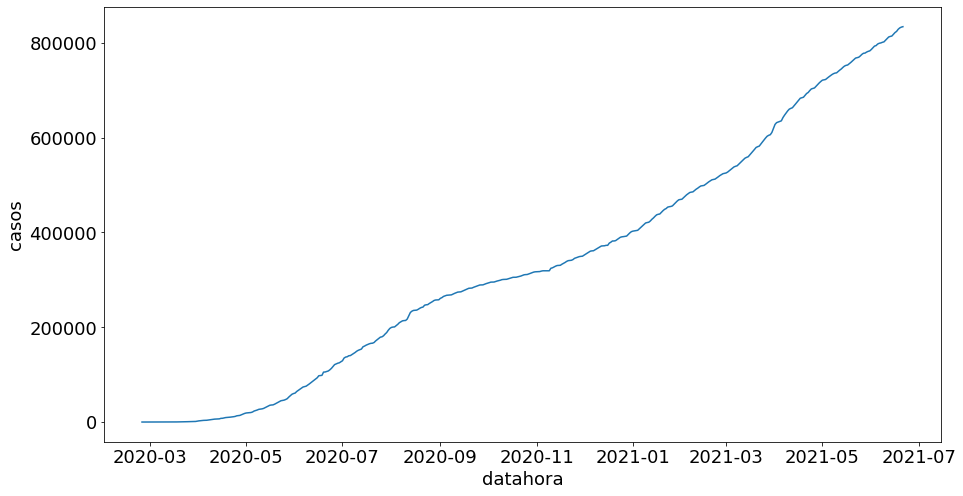

In [15]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')

*trocando a escala do eixo y*

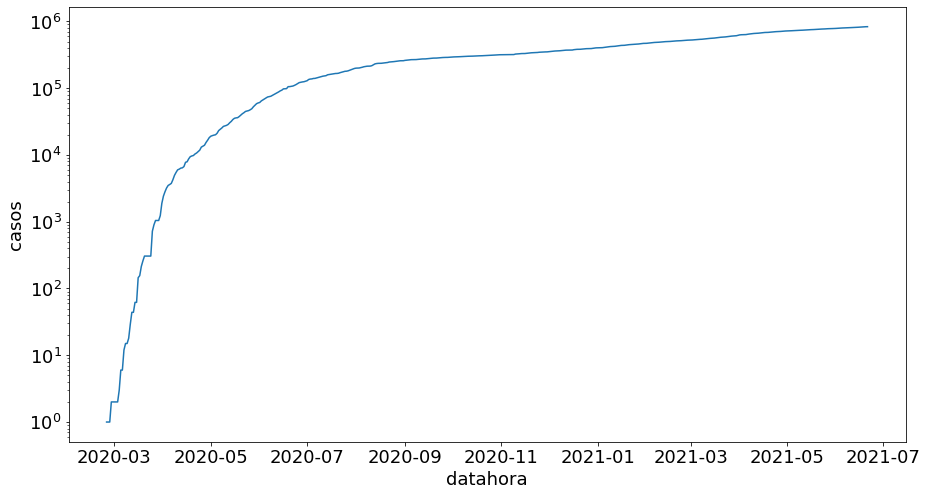

In [16]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')
plt.yscale('log')

## Desafio 01 - Filtrar a base com outra função

**Método utilizando o própio df**

In [17]:
dados_sp = dados[dados['nome_munic'] == 'São Paulo']
dados_sp.reset_index(inplace=True)
dados_sp.drop('index', axis=1, inplace=True)
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0  São Paulo      3550308   25  ...  -23.5329  -46.6395              9
1  São Paulo      3550308   26  ...  -23.5329  -46.6395              9
2  São Paulo      3550308   27  ...  -23.5329  -46.6395              9
3  São Paulo      3550308   28  ...  -23.5329  -46.6395              9
4  São Paulo      3550308   29  ...  -23.5329  -46.6395              9

[5 rows x 26 columns]

**Método utilizando query com valores alocados em uma variável externa. Esta variável pode conter um ou mais itens numa lista**

In [18]:
cidade_query = ['São Paulo']
dados_sp = dados.query('nome_munic in @cidade_query')
dados_sp.reset_index(inplace=True)
dados_sp.drop('index', axis=1, inplace=True)
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0  São Paulo      3550308   25  ...  -23.5329  -46.6395              9
1  São Paulo      3550308   26  ...  -23.5329  -46.6395              9
2  São Paulo      3550308   27  ...  -23.5329  -46.6395              9
3  São Paulo      3550308   28  ...  -23.5329  -46.6395              9
4  São Paulo      3550308   29  ...  -23.5329  -46.6395              9

[5 rows x 26 columns]

## Desafio 02 - Escolher outro município

**Escolhendo o município de Praia Grande**

In [19]:
dados_pg = dados.query('nome_munic == "Praia Grande"')
dados_pg.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
459   Praia Grande      3541000   25  ...  -24.0084  -46.4121              9
1104  Praia Grande      3541000   26  ...  -24.0084  -46.4121              9
1749  Praia Grande      3541000   27  ...  -24.0084  -46.4121              9
2394  Praia Grande      3541000   28  ...  -24.0084  -46.4121              9
3039  Praia Grande      3541000   29  ...  -24.0084  -46.4121              9

[5 rows x 26 columns]

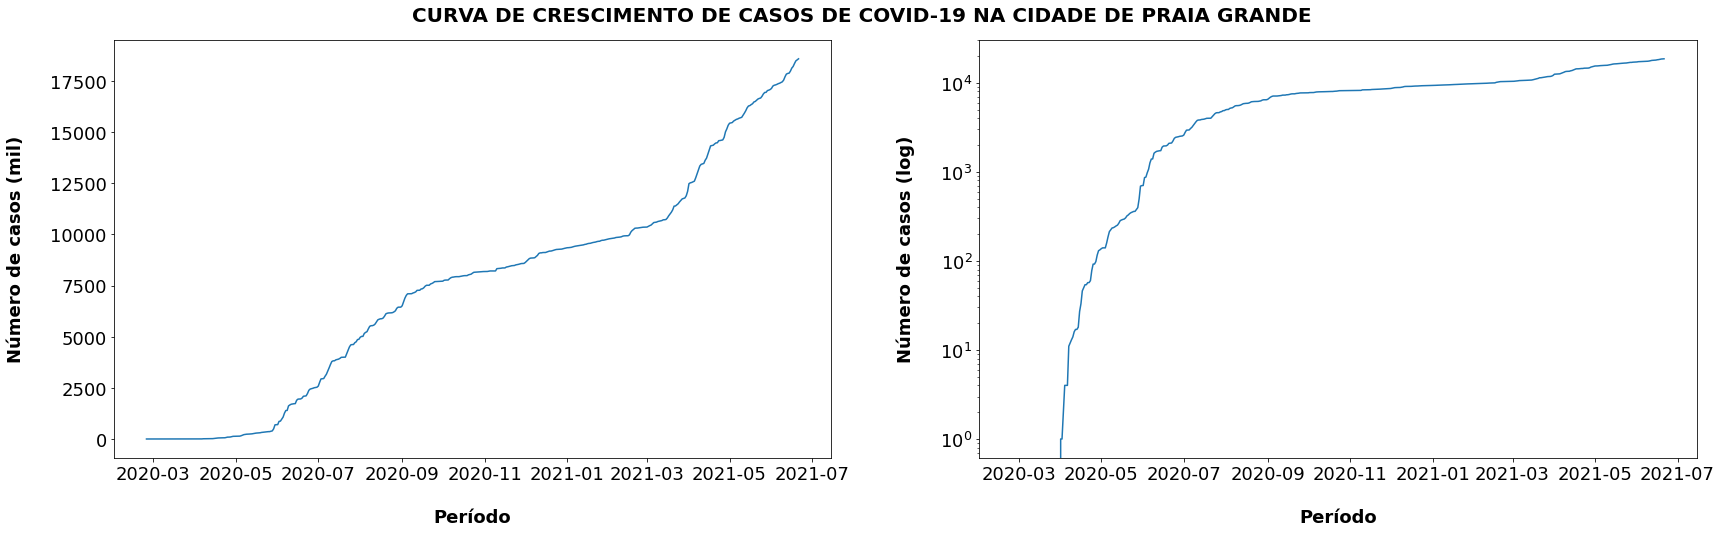

In [20]:
nome_cidade = [x for x in dados_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' ' + x


figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.subplot(1,2,1)
sns.lineplot(data=dados_pg, x='datahora',y='casos')

plt.ylabel('Número de casos (mil)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.subplot(1,2,2)
sns.lineplot(data=dados_pg, x='datahora',y='casos')

plt.ylabel('Número de casos (log)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.yscale('log')

figure.tight_layout(pad=2.5)

plt.suptitle('Curva de crescimento de casos de covid-19 na cidade de{}\n'.format(s).upper(), 
          weight='bold',
          fontsize=20)


plt.show()

**Juntando os dados de São Paulo e Praia Grande em um df**

In [21]:
dados_sp_pg = dados_sp.append(dados_pg)
dados_sp_pg.reset_index(inplace=True)
dados_sp_pg.drop('index', axis=1, inplace=True)
dados_sp_pg.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0  São Paulo      3550308   25  ...  -23.5329  -46.6395              9
1  São Paulo      3550308   26  ...  -23.5329  -46.6395              9
2  São Paulo      3550308   27  ...  -23.5329  -46.6395              9
3  São Paulo      3550308   28  ...  -23.5329  -46.6395              9
4  São Paulo      3550308   29  ...  -23.5329  -46.6395              9

[5 rows x 26 columns]

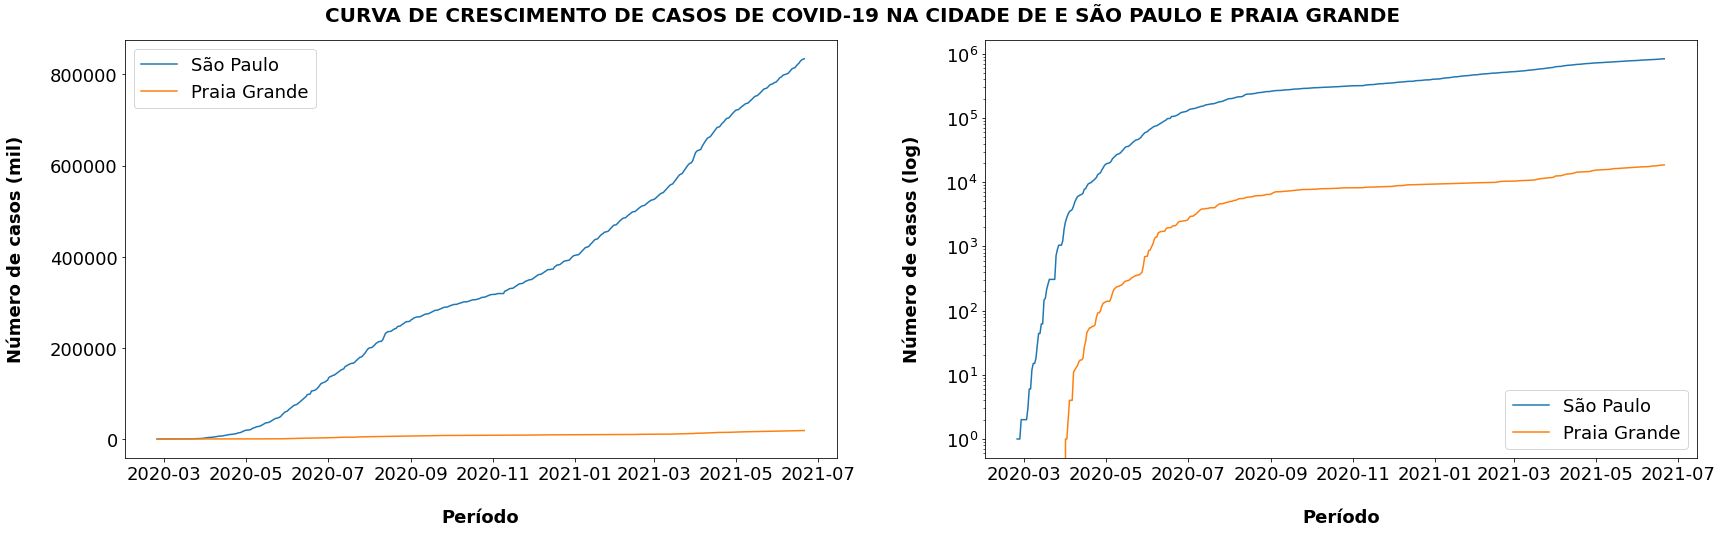

In [22]:
nome_cidade = [x for x in dados_sp_pg.nome_munic.unique()]

s = ''
for x in nome_cidade:
  s = s + ' e ' + x

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.subplot(1,2,1)
sns.lineplot(data=dados_sp_pg, 
             x='datahora',
             y='casos',
             hue='nome_munic')
plt.legend(loc=0)

plt.ylabel('Número de casos (mil)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')


plt.subplot(1,2,2)
ax = sns.lineplot(data=dados_sp_pg, 
             x='datahora', 
             y='casos', 
             hue='nome_munic')

plt.legend(loc=4)

plt.ylabel('Número de casos (log)\n', weight='bold')
plt.xlabel('\nPeríodo', weight='bold')

plt.yscale('log')

figure.tight_layout(pad=2.5)

plt.suptitle('Curva de crescimento de casos de covid-19 na cidade de{}\n'.format(s).upper(), 
          weight='bold',
          fontsize=20)


plt.show()

# Aula 01 - Taxa de crescimento e média móvel

In [23]:
dados_sp.columns

Index(['nome_munic', 'codigo_ibge', 'dia', 'mes', 'datahora', 'casos',
       'casos_novos', 'casos_pc', 'casos_mm7d', 'obitos', 'obitos_novos',
       'obitos_pc', 'obitos_mm7d', 'letalidade', 'nome_ra', 'cod_ra',
       'nome_drs', 'cod_drs', 'pop', 'pop_60', 'area', 'map_leg', 'map_leg_s',
       'latitude', 'longitude', 'semana_epidem'],
      dtype='object')

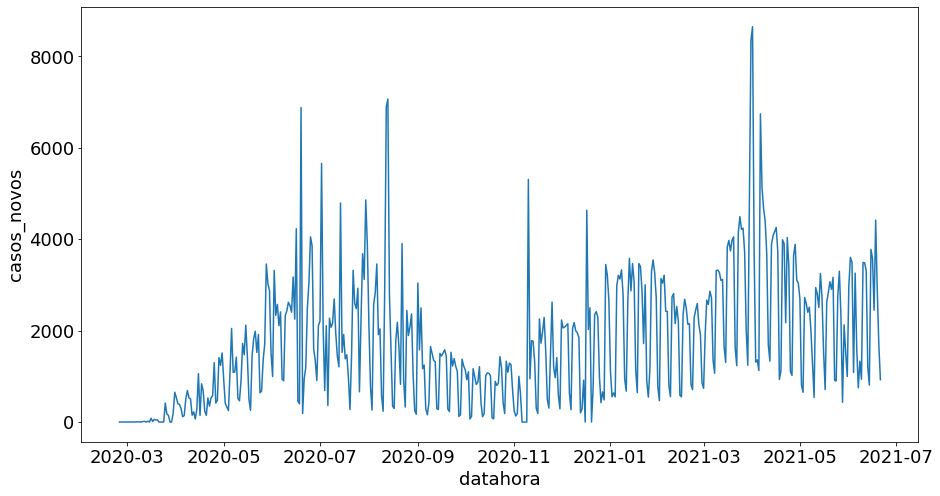

In [24]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')

*Diferenciação*

**Criando um df para exemplo**

In [25]:
dados_exemplo = pd.DataFrame(np.linspace(1,10, 10))

In [26]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

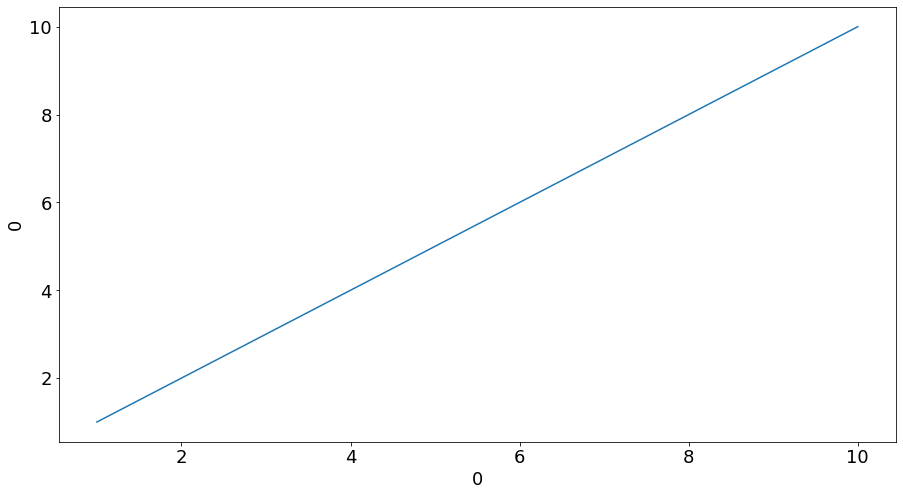

In [27]:
sns.lineplot(data= dados_exemplo, x=0, y=0)

In [28]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

In [29]:
dados_exemplo.head()

0  diferenciado
0  1.0           NaN
1  2.0           1.0
2  3.0           1.0
3  4.0           1.0
4  5.0           1.0

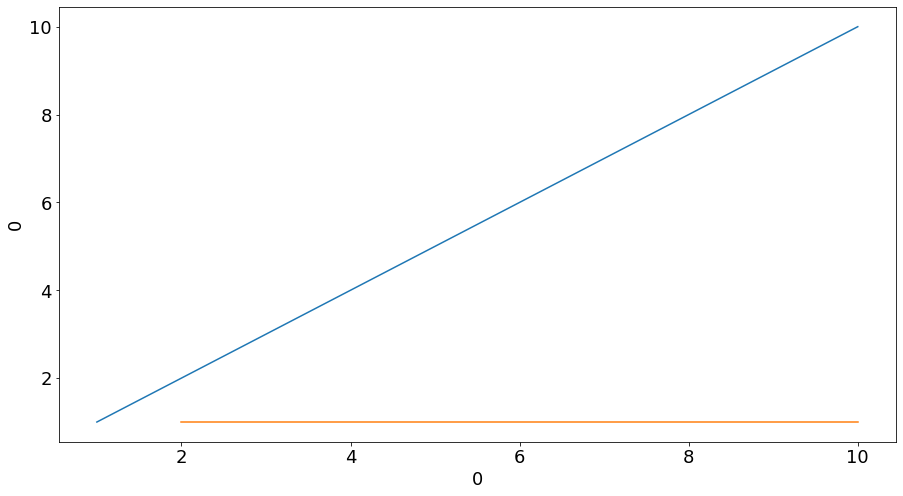

In [30]:
sns.lineplot(data= dados_exemplo, x=0, y=0)
sns.lineplot(data=dados_exemplo, x=0 , y='diferenciado')

In [31]:
dados_sp.columns

Index(['nome_munic', 'codigo_ibge', 'dia', 'mes', 'datahora', 'casos',
       'casos_novos', 'casos_pc', 'casos_mm7d', 'obitos', 'obitos_novos',
       'obitos_pc', 'obitos_mm7d', 'letalidade', 'nome_ra', 'cod_ra',
       'nome_drs', 'cod_drs', 'pop', 'pop_60', 'area', 'map_leg', 'map_leg_s',
       'latitude', 'longitude', 'semana_epidem'],
      dtype='object')

In [32]:
dados_sp['taxa_de_cresimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_cresimento_obitos'] = dados_sp['obitos_novos'].diff()

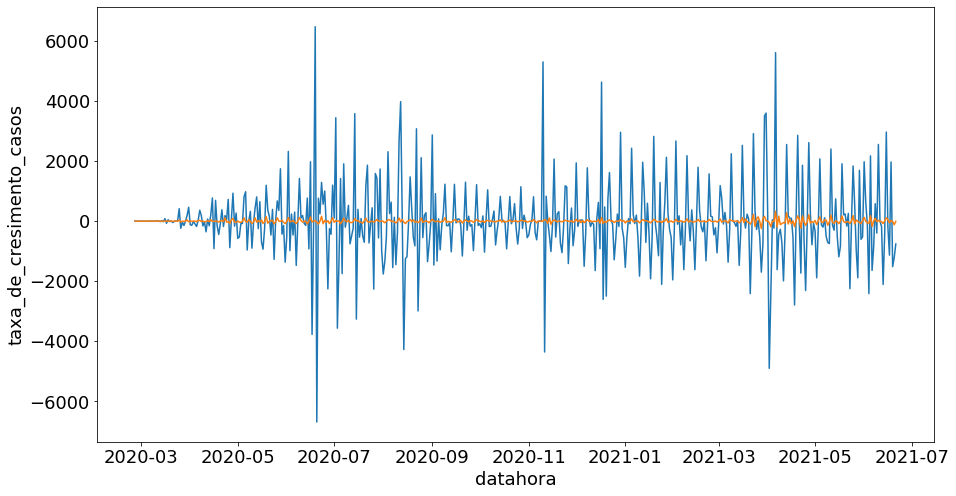

In [33]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_cresimento_casos')
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_cresimento_obitos')

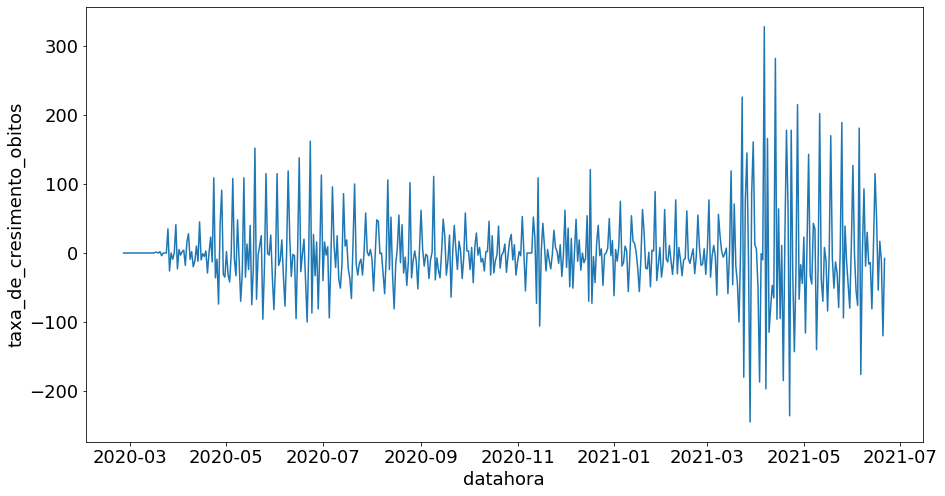

In [34]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_cresimento_obitos')

*Entendo melhor como a função diff funciona*

In [35]:
help(pd.DataFrame.diff)

Help on function diff in module pandas.core.frame:

diff(self, periods: int = 1, axis: Union[str, int] = 0) -> 'DataFrame'
    First discrete difference of element.
    
    Calculates the difference of a Dataframe element compared with another
    element in the Dataframe (default is element in previous row).
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for calculating difference, accepts negative
        values.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Take difference over rows (0) or columns (1).
    
    Returns
    -------
    Dataframe
        First differences of the Series.
    
    See Also
    --------
    Dataframe.pct_change: Percent change over given number of periods.
    Dataframe.shift: Shift index by desired number of periods with an
        optional time freq.
    Series.diff: First discrete difference of object.
    
    Notes
    -----
    For boolean dtypes, this uses :meth:`operator.xor` rather than
 

*Plotando o gráfico de barras*

<BarContainer object of 483 artists>

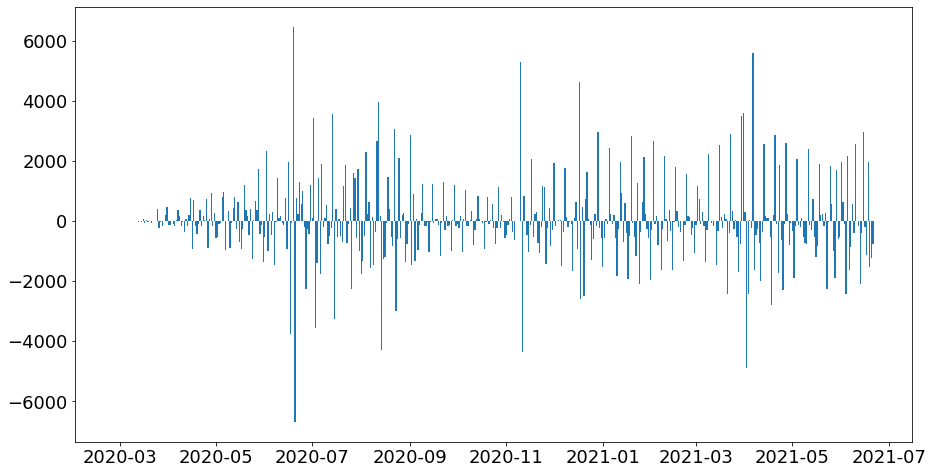

In [36]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_cresimento_casos'])

*Criando a variável para ano*

In [37]:
dados_sp['ano'] = dados_sp['datahora'].dt.year

<BarContainer object of 483 artists>

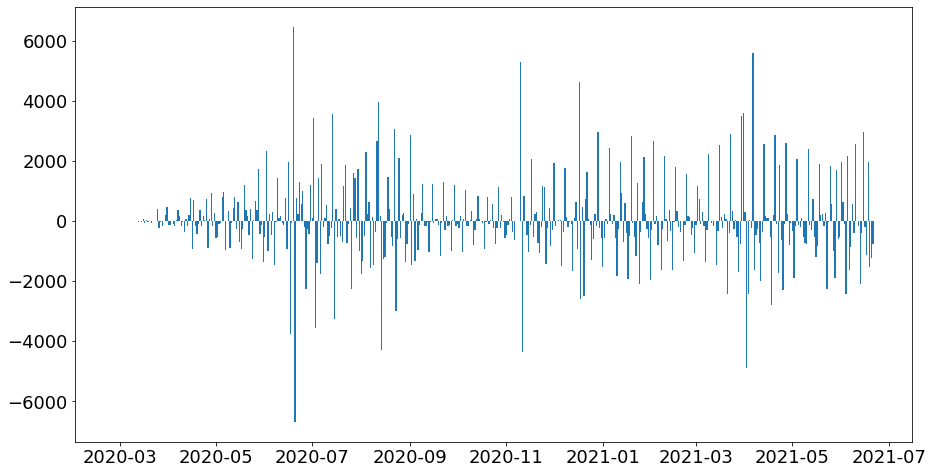

In [38]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_cresimento_casos'])

*Criando novo df so com o ano de 2021*

In [39]:
dados_sp_2021 = dados_sp.query('ano == 2021')
dados_sp_2021.head()

nome_munic  codigo_ibge  ...  taxa_de_cresimento_obitos   ano
311  São Paulo      3550308  ...                      -62.0  2021
312  São Paulo      3550308  ...                        5.0  2021
313  São Paulo      3550308  ...                      -12.0  2021
314  São Paulo      3550308  ...                        9.0  2021
315  São Paulo      3550308  ...                       75.0  2021

[5 rows x 29 columns]

*resetando o index de dados_sp_2021*

In [40]:
dados_sp_2021.reset_index(inplace=True)
dados_sp_2021.drop('index', axis=1, inplace=True)
dados_sp_2021.head()

nome_munic  codigo_ibge  ...  taxa_de_cresimento_obitos   ano
0  São Paulo      3550308  ...                      -62.0  2021
1  São Paulo      3550308  ...                        5.0  2021
2  São Paulo      3550308  ...                      -12.0  2021
3  São Paulo      3550308  ...                        9.0  2021
4  São Paulo      3550308  ...                       75.0  2021

[5 rows x 29 columns]

<BarContainer object of 172 artists>

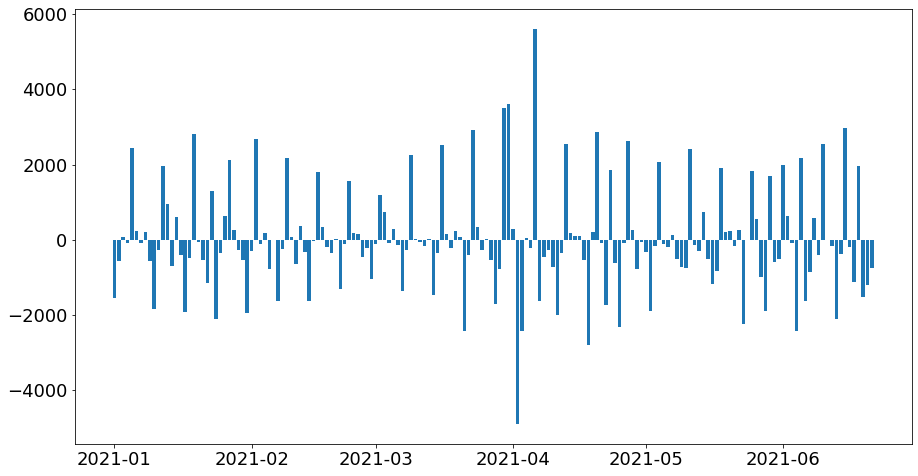

In [41]:
plt.bar(dados_sp_2021['datahora'], dados_sp_2021['taxa_de_cresimento_casos'])

*Criando nova variável para média movel*

In [42]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

In [43]:
dados_sp.head()

nome_munic  codigo_ibge  dia  ...   ano media_movel_casos  media_movel_obitos
0  São Paulo      3550308   25  ...  2020               NaN                 NaN
1  São Paulo      3550308   26  ...  2020               NaN                 NaN
2  São Paulo      3550308   27  ...  2020               NaN                 NaN
3  São Paulo      3550308   28  ...  2020               NaN                 NaN
4  São Paulo      3550308   29  ...  2020               NaN                 NaN

[5 rows x 31 columns]

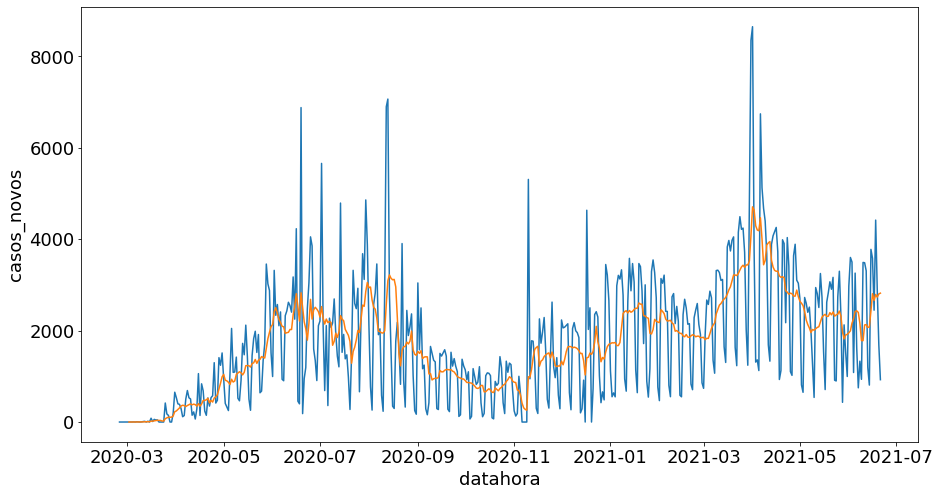

In [44]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

## Desafio 01 - Retirar os warnings da página

In [45]:
# import warnings
# warnings.filterwarnings('ignore')

## Desafio 02 - Pico taxa de casos novos coincide com taxa de obitos novos

In [46]:
dados_sp_2021.head()

nome_munic  codigo_ibge  ...  taxa_de_cresimento_obitos   ano
0  São Paulo      3550308  ...                      -62.0  2021
1  São Paulo      3550308  ...                        5.0  2021
2  São Paulo      3550308  ...                      -12.0  2021
3  São Paulo      3550308  ...                        9.0  2021
4  São Paulo      3550308  ...                       75.0  2021

[5 rows x 29 columns]

<b>*Utilizando a biblioteca scipy.signal.find_peaks para encontrar picos*</b>

- Criei esse passo, pois não estava conseguindo plotar um gráficos de barras junto com os picos. 
- Os exemplos da biblioteca plotam os picos junto com o gráfico de linhas que não era a minha intenção no momento.

In [47]:
peaks, _ = find_peaks(dados_sp_2021['casos_novos'], distance=5) # find_peaks para encontrar os picos com distancia entre vizinhos de 5
p = dados_sp_2021['casos_novos'][peaks] # guardando o indice dos picos 
peaks_df = pd.DataFrame(p) # criando um Dataframe dos picos
peaks_df.columns = ['picos_casos_novos'] # renomeando a coluna
peaks_df.head()

picos_casos_novos
2                 637
7                3329
12               3580
18               3466
27               3545

<b>*Concatenando os dois DataFrames*</b>

In [48]:
dados_sp_2021 = pd.concat([dados_sp_2021, peaks_df], axis=1)
dados_sp_2021.head()

nome_munic  codigo_ibge  ...   ano  picos_casos_novos
0  São Paulo      3550308  ...  2021                NaN
1  São Paulo      3550308  ...  2021                NaN
2  São Paulo      3550308  ...  2021              637.0
3  São Paulo      3550308  ...  2021                NaN
4  São Paulo      3550308  ...  2021                NaN

[5 rows x 30 columns]

<b>*Plotando os picos para casos novos*</b>

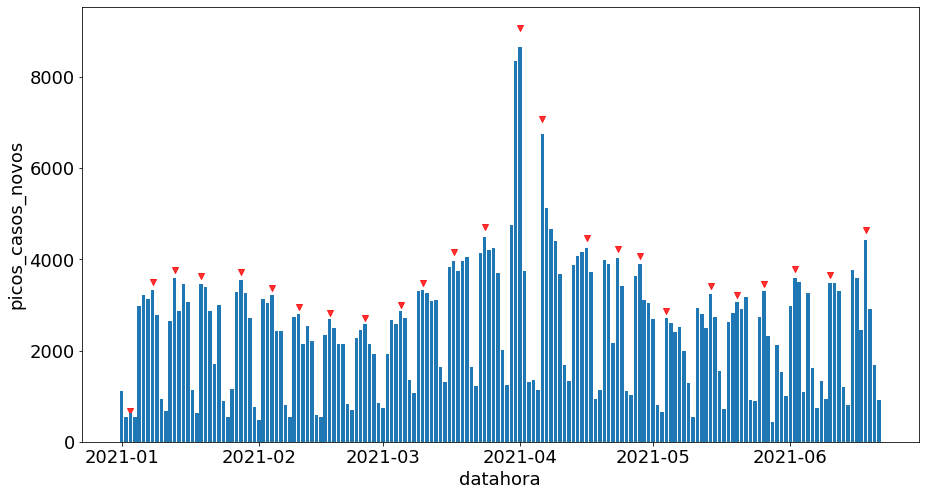

In [49]:
plt.bar(data=dados_sp_2021, x='datahora', height='casos_novos')
# sns.scatterplot(data=dados_sp_2021, x='datahora', y=dados_sp_2021['picos'] * 1.05, markers=(True, 'v'))
sns.regplot(x=dados_sp_2021["datahora"], y=dados_sp_2021["picos_casos_novos"]*1.05, marker="v", fit_reg=False, color='red')

## Desafio 03 - Melhorar a visualização dos gráficos

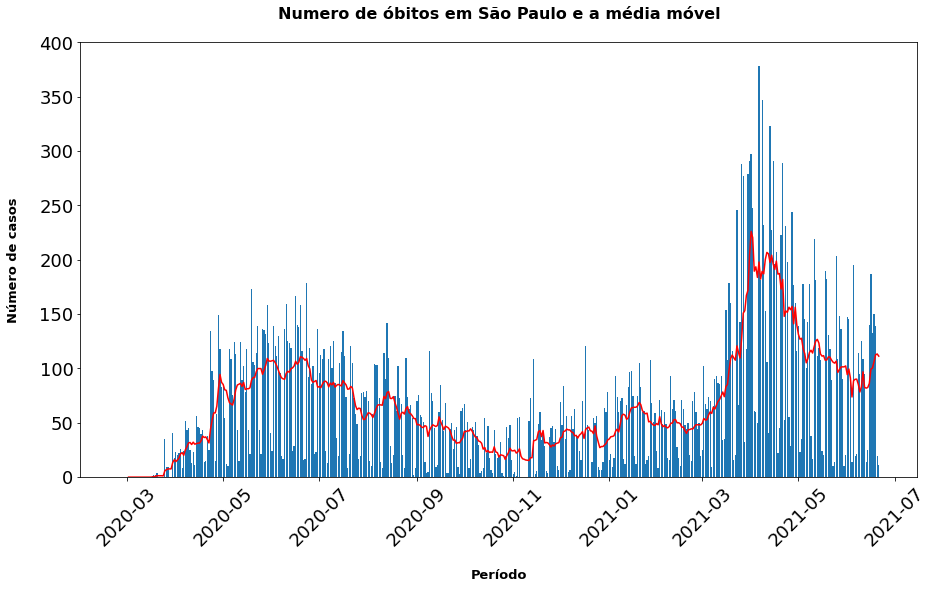

In [50]:
plt.bar(data=dados_sp, x='datahora', height='obitos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos', color='r')

plt.xlabel('\nPeríodo', weight='bold', fontsize=13)
plt.ylabel('Número de casos\n', weight='bold', fontsize=13)
plt.title('Numero de óbitos em São Paulo e a média móvel\n', weight='bold', fontsize=16)

plt.ylim(0,400)
plt.xticks(rotation=45)

plt.show()

## Desafio 04 - Gráfico de média movel para casos de obitos. casos obitos como barra e média movel como linha

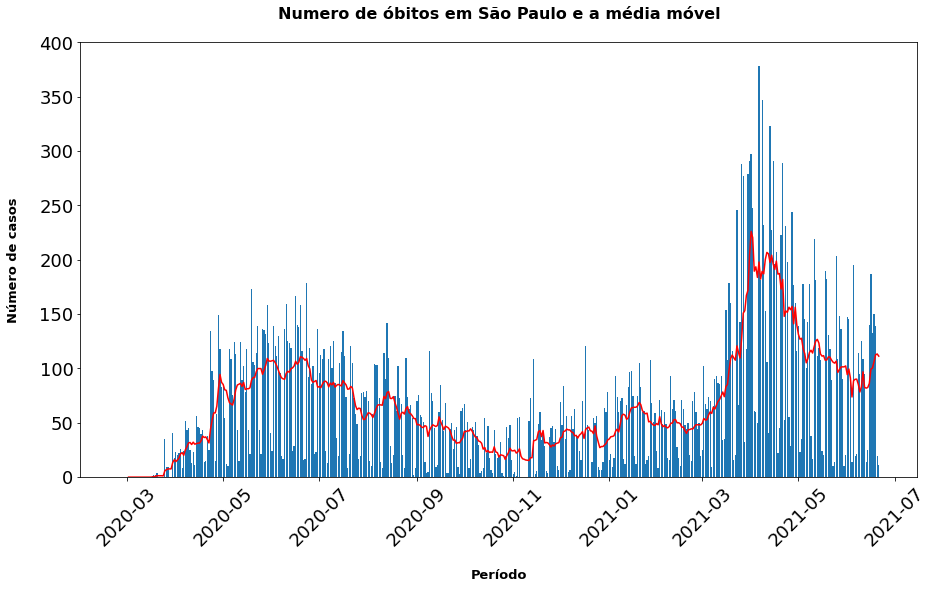

In [51]:
plt.bar(data=dados_sp, x='datahora', height='obitos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos', color='r')

plt.xlabel('\nPeríodo', weight='bold', fontsize=13)
plt.ylabel('Número de casos\n', weight='bold', fontsize=13)
plt.title('Numero de óbitos em São Paulo e a média móvel\n', weight='bold', fontsize=16)

plt.ylim(0,400)
plt.xticks(rotation=45)

plt.show()

# Aula 01 - Correlação e função de autocorrelação

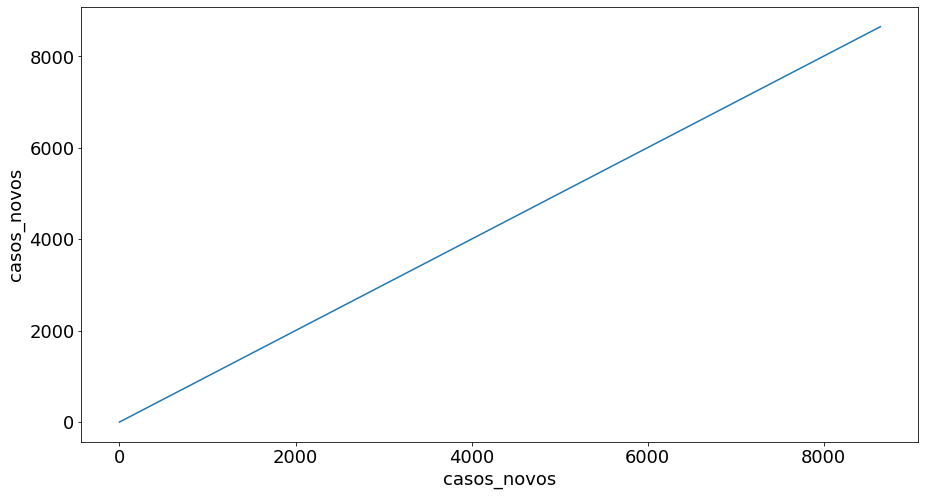

In [52]:
sns.lineplot(data=dados_sp, x='casos_novos', y='casos_novos')

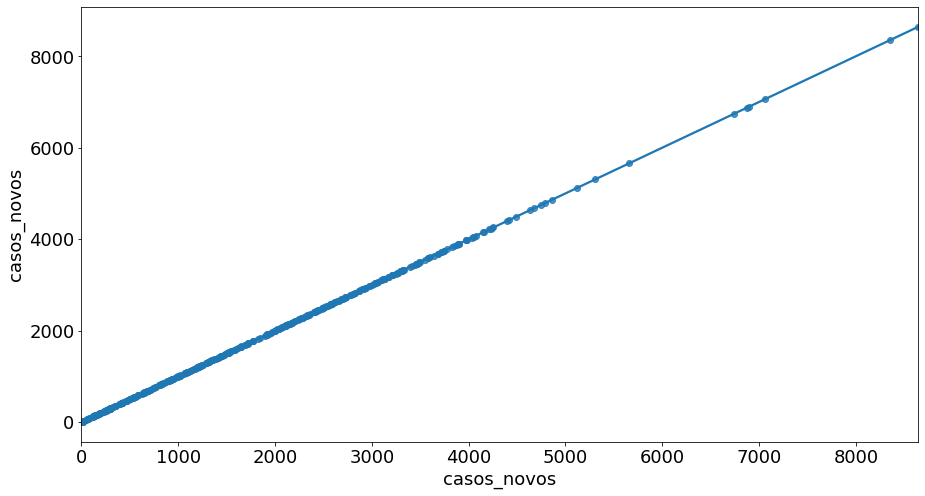

In [53]:
sns.regplot(data=dados_sp, x='casos_novos', y='casos_novos')

In [54]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

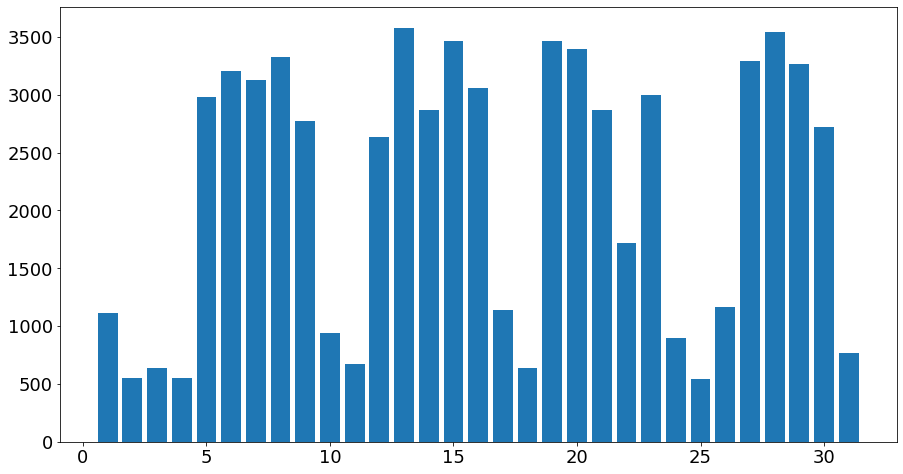

In [55]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()

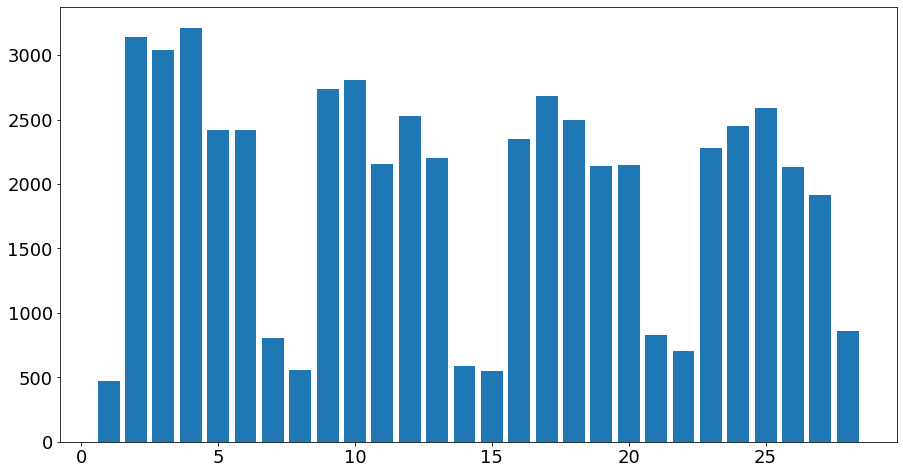

In [56]:
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])
plt.show()

In [57]:
from pandas.plotting import autocorrelation_plot


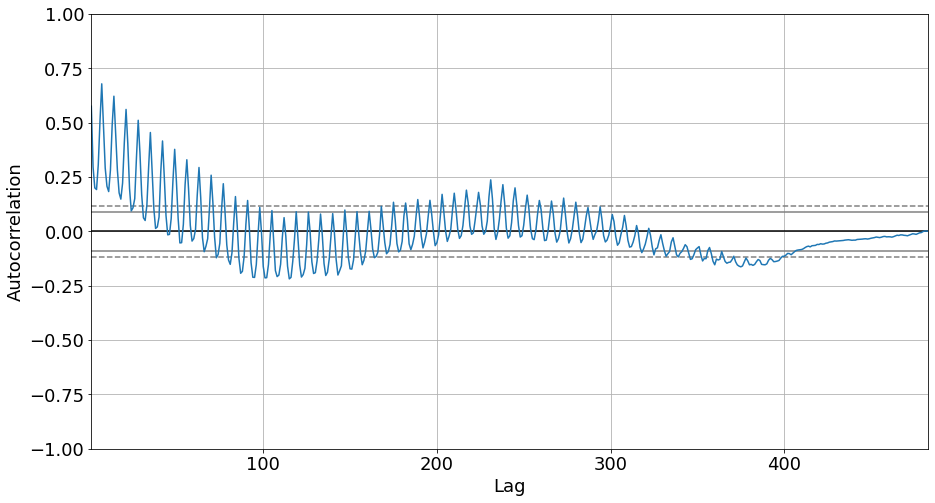

In [58]:
autocorrelation_plot(dados_sp['casos_novos'])

In [59]:
dados_sp[['casos_novos', 'obitos_novos']].corr()

casos_novos  obitos_novos
casos_novos      1.000000      0.736944
obitos_novos     0.736944      1.000000

## Desafio 01 - Correlação entre óbitos e casos para diferentes janelas temporais

**Infernal**

Depois de muito tempo estudando e tentando definir qual seria a melhor abordagem para conseguir a correlação entre o numero de óbitos e de casos fiz o seguinte.


<b>I</b> - Primeiramente mudei o estilo de plot da autocorrelação de linha para o regplot, que plota os dados e um modelo de regressão linear ajustado. Sendo assim quando os valores de 'casos_novos' e plotado contra eles mesmo temos uma correlação perfeita. 

Então criei colunas para obitos movendo a série em 5, 7, 10, 14, 30 e 45 dias, e como a série foi alterada o final do DataFrame ficaria com valores nulos, assim eliminei esses valores, pois as análises seguintes precisariam de séries de tamanhos iguais. Após isso plotei o regplot dos casos X obitos para todos os períodos.

olhando os gráficos podemos ver que a inclinação da curva mudava para cada um deles. Lembrando das minhas pesquisas na iniciação científica eu relembrei de um conceito, $$R^2$$, que indica a porcentagem de correlação entre o eixo x e y de um gráfico. Desta forma, como sugerido pelo instrutor eu fui dar uma pesquisa da biblioteca statsmodels e procurar por alguma função que pudesse retornar esse valor. Encontrei o 'OLS' Ordinary Least Square. Realizei o cruzamento de Casos Novos contra ele mesmo e como esperado o valor para R² foi de 1 e ao mesmo tempo desci pela toca do coelho!!

```
import statsmodels.api as sm

In >>> mod = sm.OLS(dados_sp['casos_novos'], dados_sp['casos_novos']) 

In >>> res = mod.fit() 

In >>> print(res.summary()) 

Out >>> 
OLS Regression Results                                
=======================================================================================
Dep. Variable:            casos_novos   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.698e+33
Date:                Sat, 19 Jun 2021   Prob (F-statistic):                        0.00
Time:                        01:55:59   Log-Likelihood:                          12918.
No. Observations:                 480   AIC:                                 -2.583e+04
Df Residuals:                     479   BIC:                                 -2.583e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
casos_novos     1.0000   1.02e-17   9.85e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      140.891   Durbin-Watson:                   0.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.684
Skew:                           1.465   Prob(JB):                     3.52e-78
Kurtosis:                       6.042   Cond. No.                         1.00
==============================================================================
```

Estudando um pouco mais acabei descobrindo que o R² expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear. Ou seja explica que os dados que foram cruzados estão ajustados ou não, e obviamente quando vc cruza um dado com ele mesmo ele sempre estará ajustado.

<b>II</b> - Procurei então na própia biblioteca do pandas se havia aluma funcão para tal e encontrei o 'pandas.DataFrame.corr' e realizei a correlação com o Obitos Novos e rodei o código abaixo:

```
In >>> dados_sp[['casos_novos', 'obitos_novos']].corr()
Out >>>                   casos_novos   obitos_novos
            casos_novos	  1.000000   	0.736695
            obitos_novos 	0.736695   	1.000000
```

Encontrei esse valor de correlação entre Casos Novos e Obitos Novos, porém não fiquei contente com o resultado. 

Procurei outros modos de realizar tal análise e tentar entender melhor o que significava o R², assisti uma meia dúzia de vídeos para compreender melhor e descobri outras bibliotecas como a patsy para pyhon, contudo não entendi muito bem o seu propósito, preciso estudar mais :(.

Voltei para o pandas e encontrei 'pandas.Series.corr' que é basicamente a mesma coisa que o 'pandas.DataFrame.corr', só que para séries ao invés de utilizar um DataFrame. E por minha falha não havia lido direito a documentação nas primeiras análises. Contudo nesse momento dediquei um pouco mais de tempo e fui ver o que os métodos para essa função indicavam e descobri os métodos seguintes:
```
Method used to compute correlation:

pearson : Standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
```
Assim fui ver qual deles se encaixava melhor na minha análise e então li que o método de Pearson é o mais amplamente utilizado para verificar correlação estatística para medir o grau de relação entre variáveis linearmente relacionadas, que é o nosso caso.

E os valores que ele expressa é o valor 'R', que é na verdade a raiz quadrada de R².

Assim os valores obtidos mostram que existe uma correlação para obitos após 7 e 14 dias, já para os outros períodos uma correlação muito baixa é observada.

In [60]:
def obitos_dias(dias: int):

  obitos_novos_dias = pd.DataFrame(dados_sp['obitos_novos'][dias:])
  obitos_novos_dias.reset_index(inplace=True)
  obitos_novos_dias.drop('index', axis=1, inplace=True)
  dados_sp['obitos_novos_{}d'.format(str(dias))] = obitos_novos_dias

In [61]:
obitos_dias(5)
obitos_dias(7)
obitos_dias(10)
obitos_dias(14)
obitos_dias(30)
obitos_dias(45)

In [62]:
dados_sp.head()

nome_munic  codigo_ibge  ...  obitos_novos_30d  obitos_novos_45d
0  São Paulo      3550308  ...               9.0              25.0
1  São Paulo      3550308  ...               9.0              13.0
2  São Paulo      3550308  ...               0.0              23.0
3  São Paulo      3550308  ...               0.0              11.0
4  São Paulo      3550308  ...              41.0              56.0

[5 rows x 37 columns]

casos_novos  obitos_novos_5d
casos_novos         1.000000         0.272338
obitos_novos_5d     0.272338         1.000000

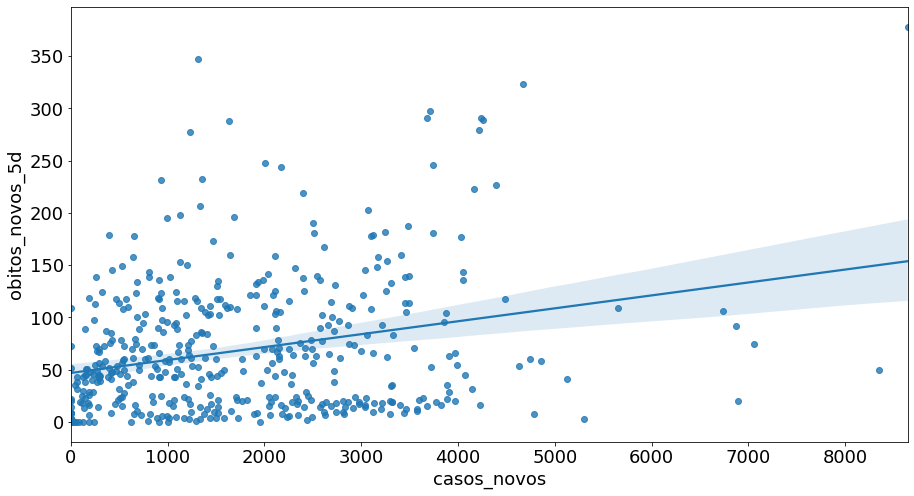

In [63]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_5d')
dados_sp[['casos_novos', 'obitos_novos_5d']].corr(method='pearson')

casos_novos  obitos_novos_7d
casos_novos         1.000000         0.681565
obitos_novos_7d     0.681565         1.000000

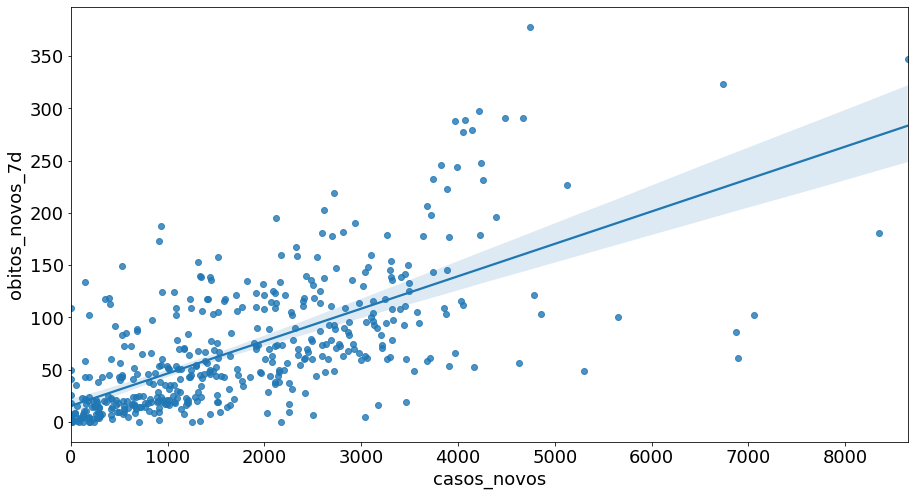

In [64]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_7d')
dados_sp[['casos_novos', 'obitos_novos_7d']].corr(method='pearson')

casos_novos  obitos_novos_10d
casos_novos          1.000000          0.187661
obitos_novos_10d     0.187661          1.000000

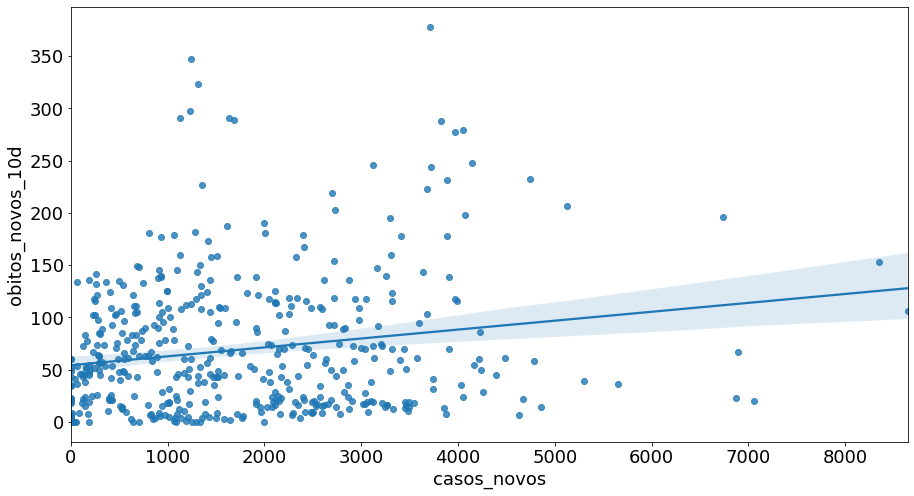

In [65]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_10d')
dados_sp[['casos_novos', 'obitos_novos_10d']].corr(method='pearson')

casos_novos  obitos_novos_14d
casos_novos          1.000000          0.650617
obitos_novos_14d     0.650617          1.000000

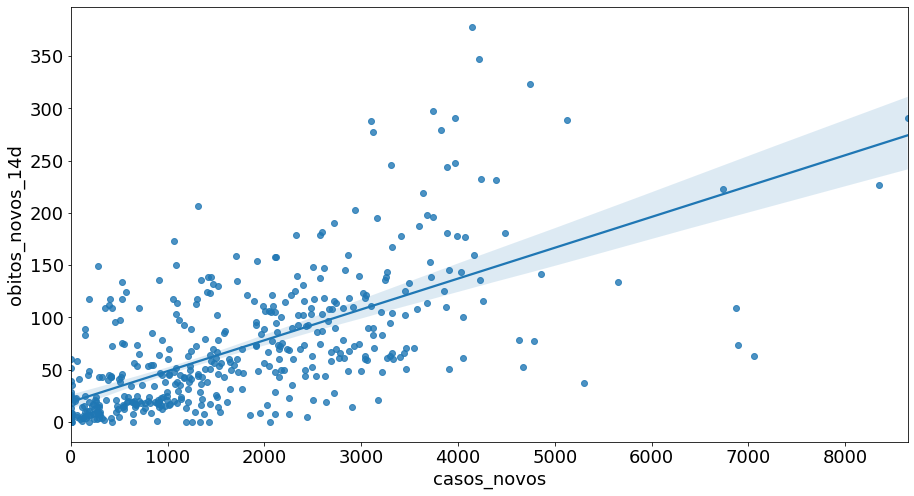

In [66]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_14d')
dados_sp[['casos_novos', 'obitos_novos_14d']].corr(method='pearson')

casos_novos  obitos_novos_30d
casos_novos          1.000000          0.095566
obitos_novos_30d     0.095566          1.000000

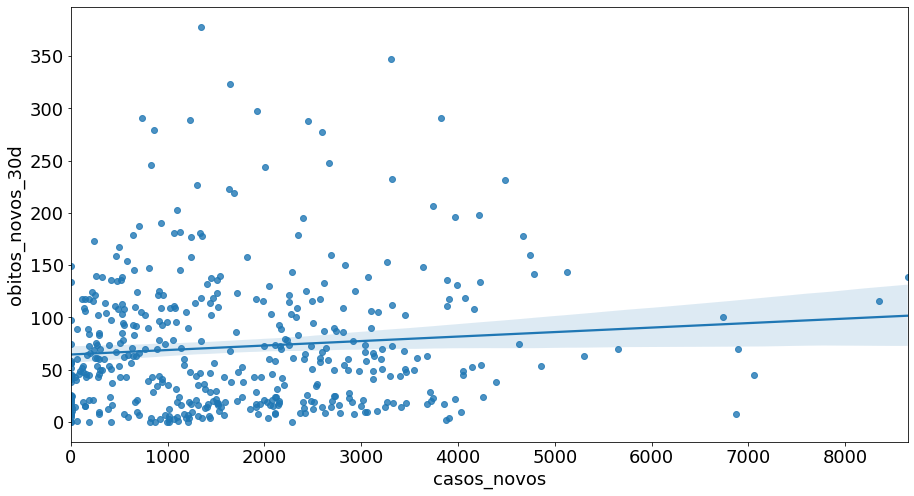

In [67]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_30d')
dados_sp[['casos_novos', 'obitos_novos_30d']].corr(method='pearson')

casos_novos  obitos_novos_45d
casos_novos          1.000000         -0.032874
obitos_novos_45d    -0.032874          1.000000

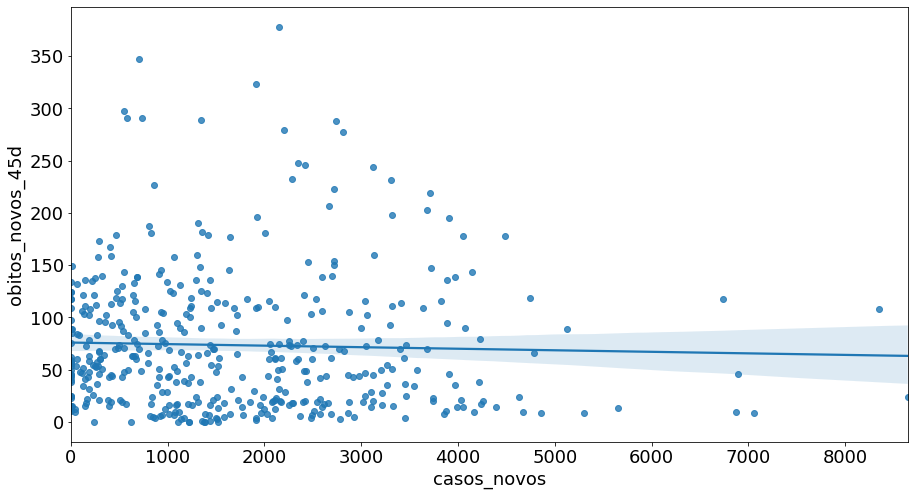

In [68]:
sns.regplot(data=dados_sp, x='casos_novos',y='obitos_novos_45d')
dados_sp[['casos_novos', 'obitos_novos_45d']].corr(method='pearson')

## Desafio 02 - Outro Município e comparar como São Paulo

In [69]:
dados_pg.reset_index(inplace=True)
dados_pg.drop('index', axis=1, inplace=True)
dados_pg.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0  Praia Grande      3541000   25  ...  -24.0084  -46.4121              9
1  Praia Grande      3541000   26  ...  -24.0084  -46.4121              9
2  Praia Grande      3541000   27  ...  -24.0084  -46.4121              9
3  Praia Grande      3541000   28  ...  -24.0084  -46.4121              9
4  Praia Grande      3541000   29  ...  -24.0084  -46.4121              9

[5 rows x 26 columns]

In [70]:
dados_pg['ano'] = dados_pg['datahora'].dt.year

In [71]:
dados_pg.head()

nome_munic  codigo_ibge  dia  ...  longitude semana_epidem   ano
0  Praia Grande      3541000   25  ...   -46.4121             9  2020
1  Praia Grande      3541000   26  ...   -46.4121             9  2020
2  Praia Grande      3541000   27  ...   -46.4121             9  2020
3  Praia Grande      3541000   28  ...   -46.4121             9  2020
4  Praia Grande      3541000   29  ...   -46.4121             9  2020

[5 rows x 27 columns]

In [72]:
dados_pg_2021 = dados_sp.query('ano == 2021')

In [73]:
dados_pg_202101 = dados_pg_2021.query('mes == 1')

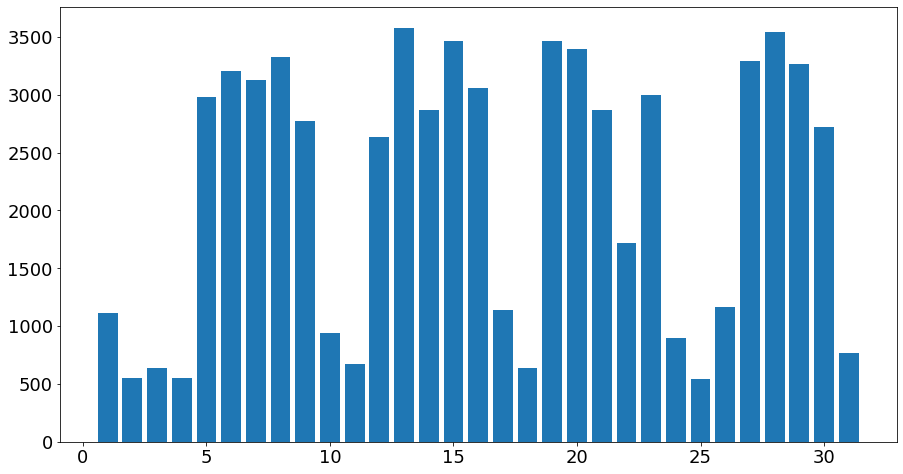

In [74]:
plt.bar(data=dados_pg_202101, x=dados_pg_202101['datahora'].dt.day, height='casos_novos')
plt.show()

# Aula 02 - Primeiras previsões com o Prophet

In [75]:
df = pd.DataFrame()

In [76]:
df['ds'] = dados_sp['datahora']

In [77]:
df['y'] = dados_sp['casos_novos']

In [78]:
modelo = Prophet()

In [79]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
dataframe_futuro = modelo.make_future_dataframe(periods=30)

In [81]:
dataframe_futuro.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [82]:
previsao = modelo.predict(dataframe_futuro)

In [83]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25  130.870653  ...                         0.0  627.596375
1 2020-02-26  143.606198  ...                         0.0  703.764892
2 2020-02-27  156.341742  ...                         0.0  795.464561
3 2020-02-28  169.077287  ...                         0.0  526.002805
4 2020-02-29  181.812831  ...                         0.0  259.319394

[5 rows x 16 columns]

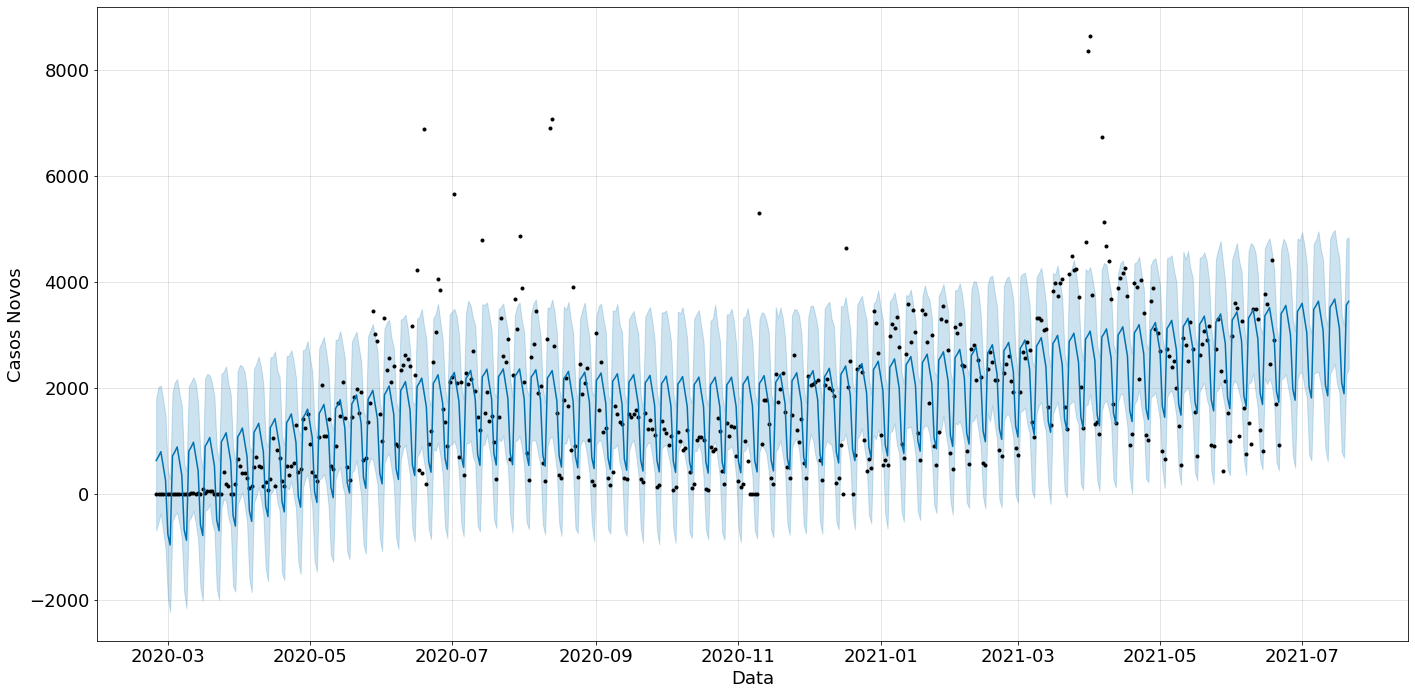

In [84]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

*Separando os dados de treino e teste*

In [85]:
df = pd.DataFrame()

In [86]:
df['ds'] = dados_sp['datahora'][:430]

In [87]:
df['y'] = dados_sp['casos_novos'][:430]

In [88]:
modelo = Prophet()

In [89]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [91]:
dataframe_futuro.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [92]:
previsao = modelo.predict(dataframe_futuro)

In [93]:
previsao.head()

ds      trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -67.166178  ...                         0.0  428.126226
1 2020-02-26 -50.804070  ...                         0.0  504.762889
2 2020-02-27 -34.441962  ...                         0.0  606.114830
3 2020-02-28 -18.079854  ...                         0.0  344.367828
4 2020-02-29  -1.717747  ...                         0.0   25.806248

[5 rows x 16 columns]

In [94]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][430:]
df_teste['y'] = dados_sp['casos_novos'][430:]

In [95]:
df_teste

ds     y
430 2021-04-30  3036
431 2021-05-01  2700
432 2021-05-02   812
433 2021-05-03   650
434 2021-05-04  2724
435 2021-05-05  2599
436 2021-05-06  2400
437 2021-05-07  2513
438 2021-05-08  1998
439 2021-05-09  1285
440 2021-05-10   538
441 2021-05-11  2941
442 2021-05-12  2808
443 2021-05-13  2505
444 2021-05-14  3248
445 2021-05-15  2732
446 2021-05-16  1544
447 2021-05-17   710
448 2021-05-18  2621
449 2021-05-19  2830
450 2021-05-20  3067
451 2021-05-21  2904
452 2021-05-22  3164
453 2021-05-23   914
454 2021-05-24   898
455 2021-05-25  2737
456 2021-05-26  3298
457 2021-05-27  2318
458 2021-05-28   431
459 2021-05-29  2125
460 2021-05-30  1520
461 2021-05-31   996
462 2021-06-01  2974
463 2021-06-02  3599
464 2021-06-03  3499
465 2021-06-04  1083
466 2021-06-05  3257
467 2021-06-06  1616
468 2021-06-07   748
469 2021-06-08  1331
470 2021-06-09   934
471 2021-06-10  3490
472 2021-06-11  3484
473 2021-06-12  3307
474 2021-06-13  1198
475 2021-06-14   808
476 2021-06-15  3776
477 2021-06-16  3580
478 2021-06-17  2446
479 2021-06-18  4416
480 2021-06-19  2900
481 2021-06-20  1686
482 2021-06-21   926

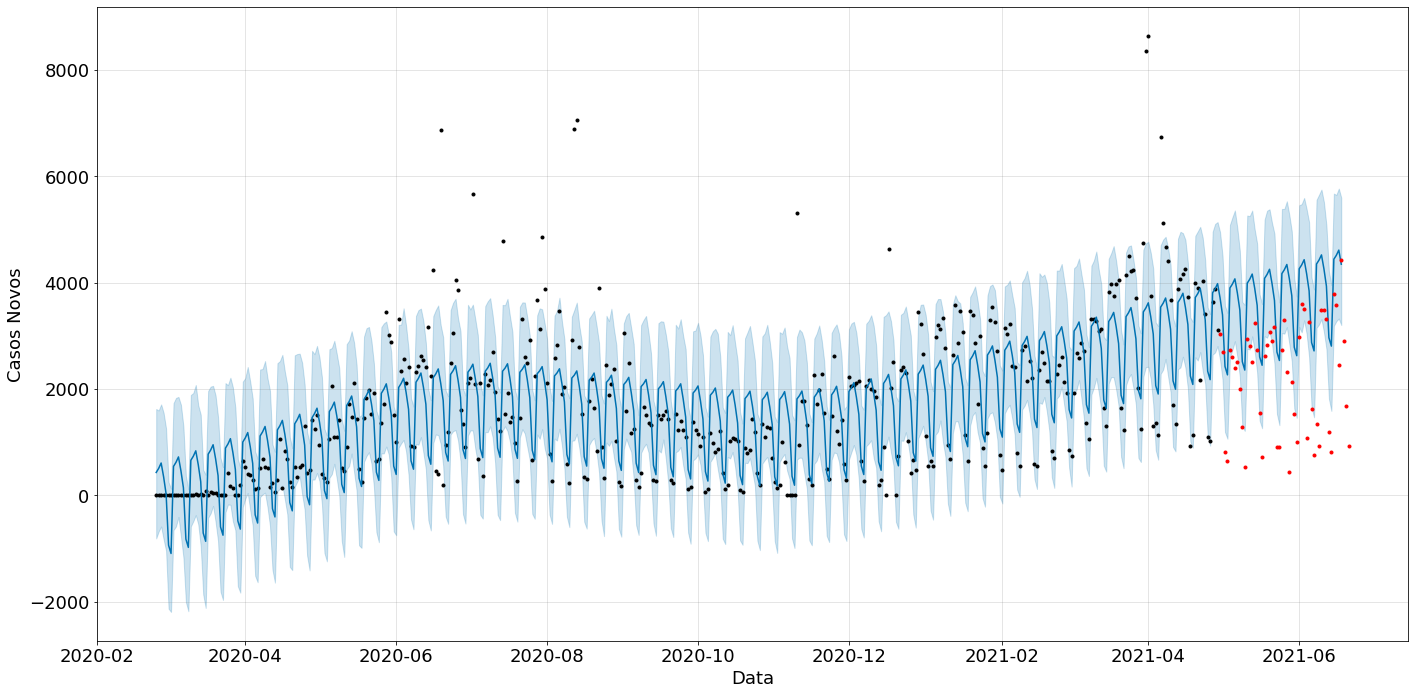

In [96]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

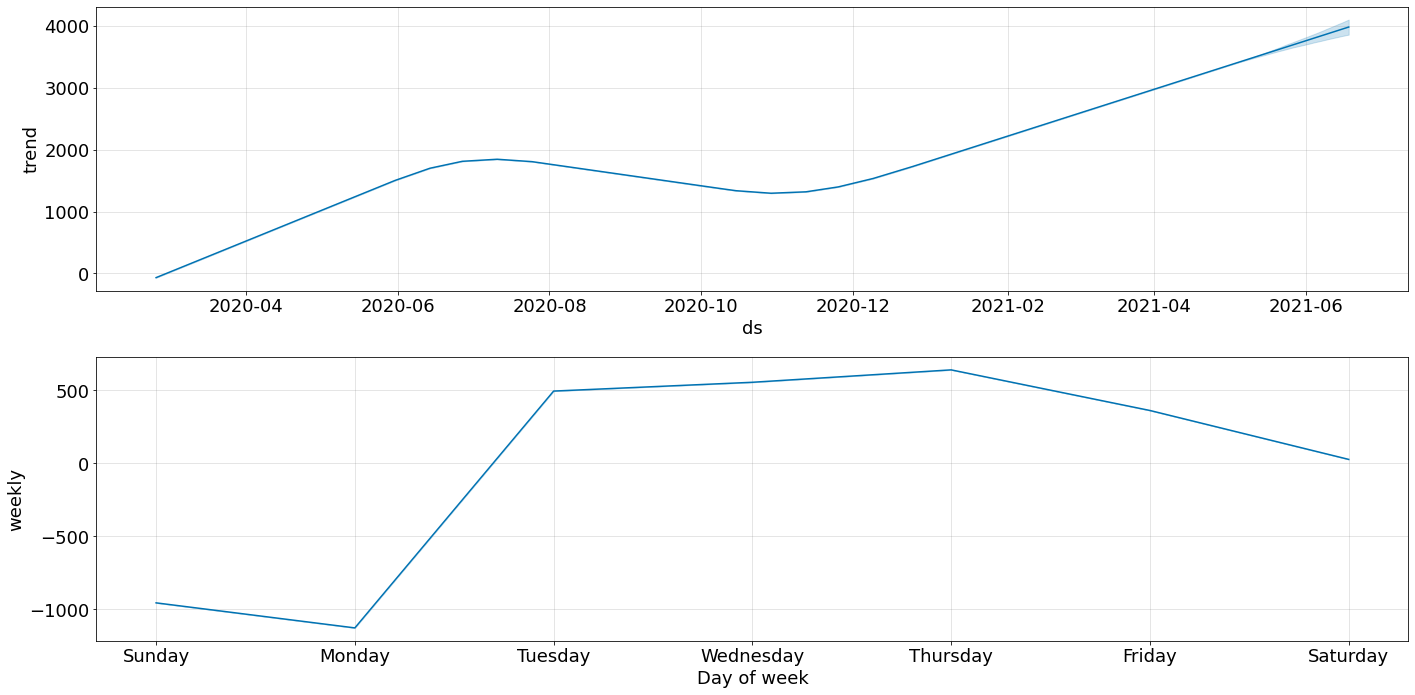

In [97]:
modelo.plot_components(previsao, figsize=(20,10));

*Verificando o qto a previsão ficou longe dos dados reis para melhorar o ajuste na previsão*

In [98]:
teste_prev = pd.DataFrame()

In [99]:
teste_prev = df_teste[['ds','y']]

In [100]:
teste_prev.columns = ['ds_teste','y_teste']

In [101]:
teste_prev = pd.concat([teste_prev,previsao['yhat'][430:]], axis=1)

In [102]:
teste_prev.head()

ds_teste  y_teste         yhat
430 2021-04-30     3036  3714.093281
431 2021-05-01     2700  3392.039392
432 2021-05-02      812  2422.435965
433 2021-05-03      650  2263.816392
434 2021-05-04     2724  3898.417196

In [103]:
teste_prev['% erro +/-'] = ((teste_prev['yhat'] / teste_prev['y_teste'])-1) * 100

In [104]:
teste_prev.head()

ds_teste  y_teste         yhat  % erro +/-
430 2021-04-30     3036  3714.093281   22.335088
431 2021-05-01     2700  3392.039392   25.631089
432 2021-05-02      812  2422.435965  198.329552
433 2021-05-03      650  2263.816392  248.279445
434 2021-05-04     2724  3898.417196   43.113700

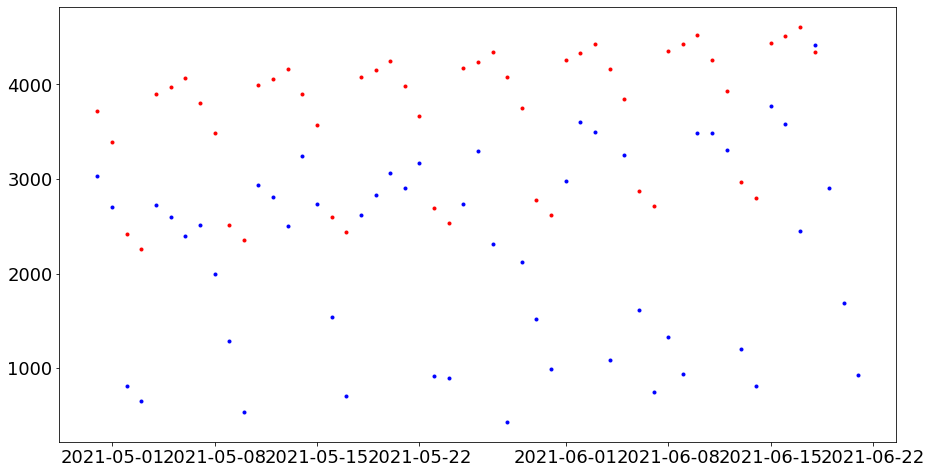

In [105]:
plt.plot(teste_prev['ds_teste'], teste_prev['y_teste'], '.b')
plt.plot(teste_prev['ds_teste'], teste_prev['yhat'], '.r')

## Desafio 01 - Mudar periodo da previsao

In [106]:
df = pd.DataFrame()

In [107]:
df['ds'] = dados_sp['datahora'][:400]

In [108]:
df['y'] = dados_sp['casos_novos'][:400]

In [109]:
modelo = Prophet()

In [110]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
dataframe_futuro = modelo.make_future_dataframe(periods=82)

In [112]:
previsao = modelo.predict(dataframe_futuro)

In [113]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

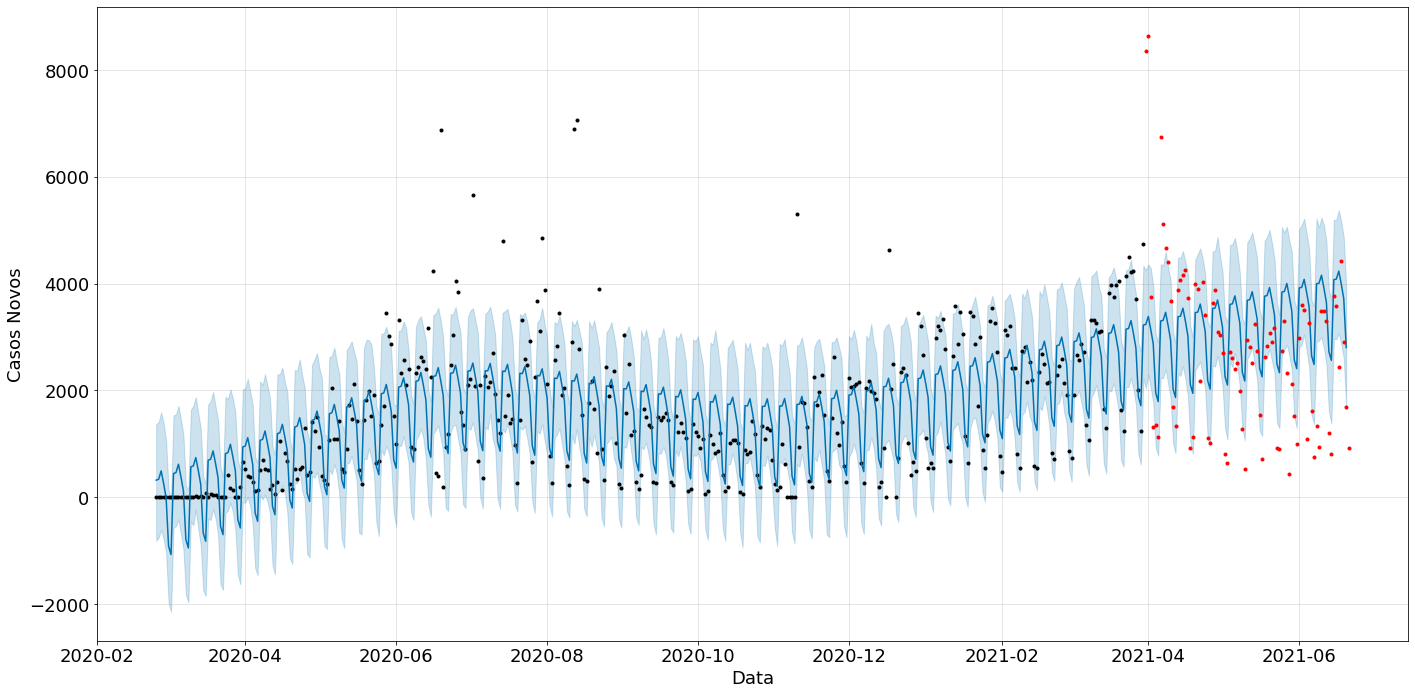

In [114]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

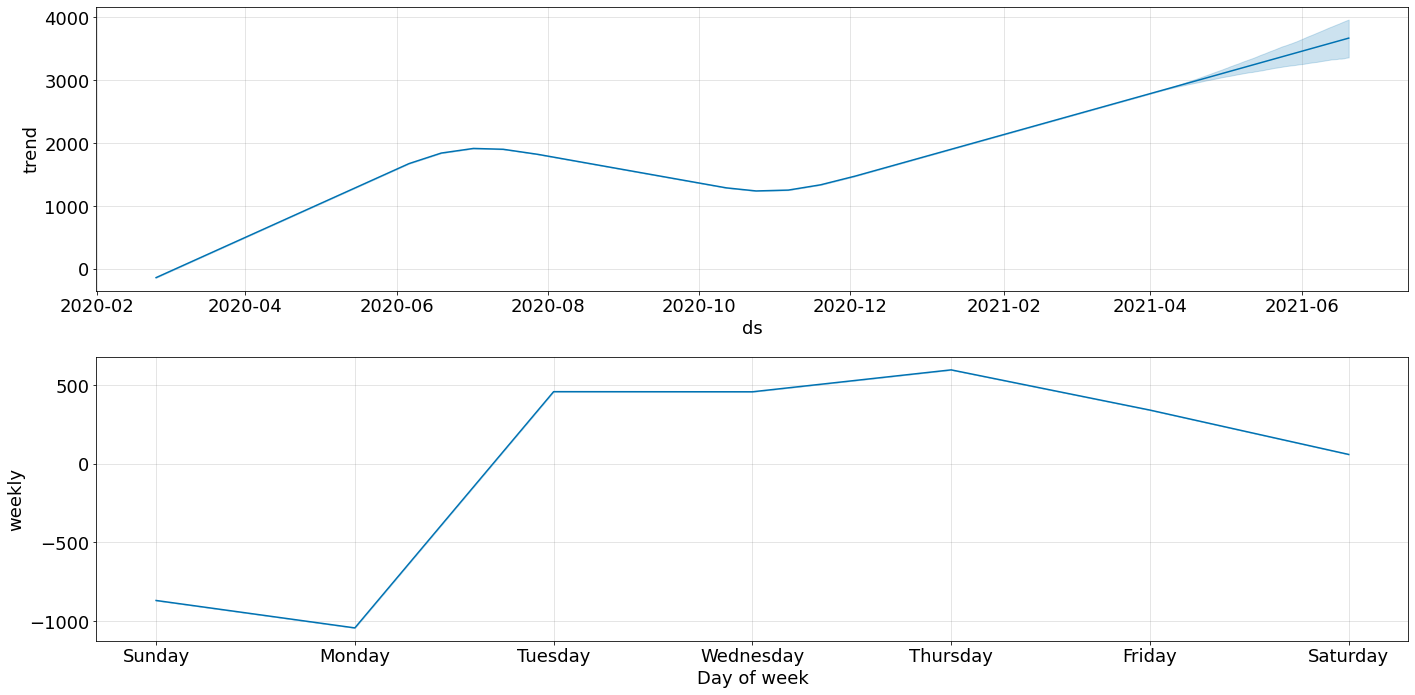

In [115]:
modelo.plot_components(previsao, figsize=(20,10));

## Desafio 02 - Documentação do Prophet

https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Desafio 03 - Melhorar os gráficos

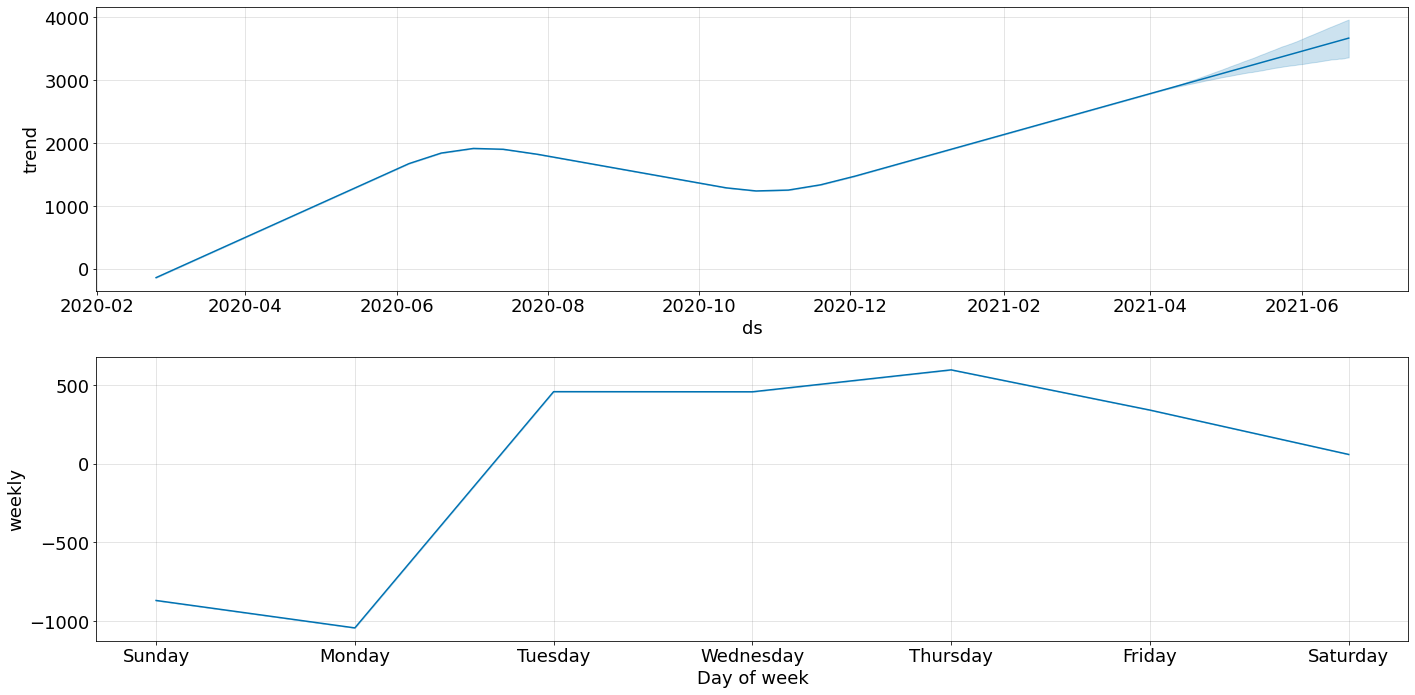

In [116]:
modelo.plot_components(previsao, figsize=(20,10));

# Aula 03 - Mudança de tendência e changepoints

In [117]:
from fbprophet.plot import add_changepoints_to_plot

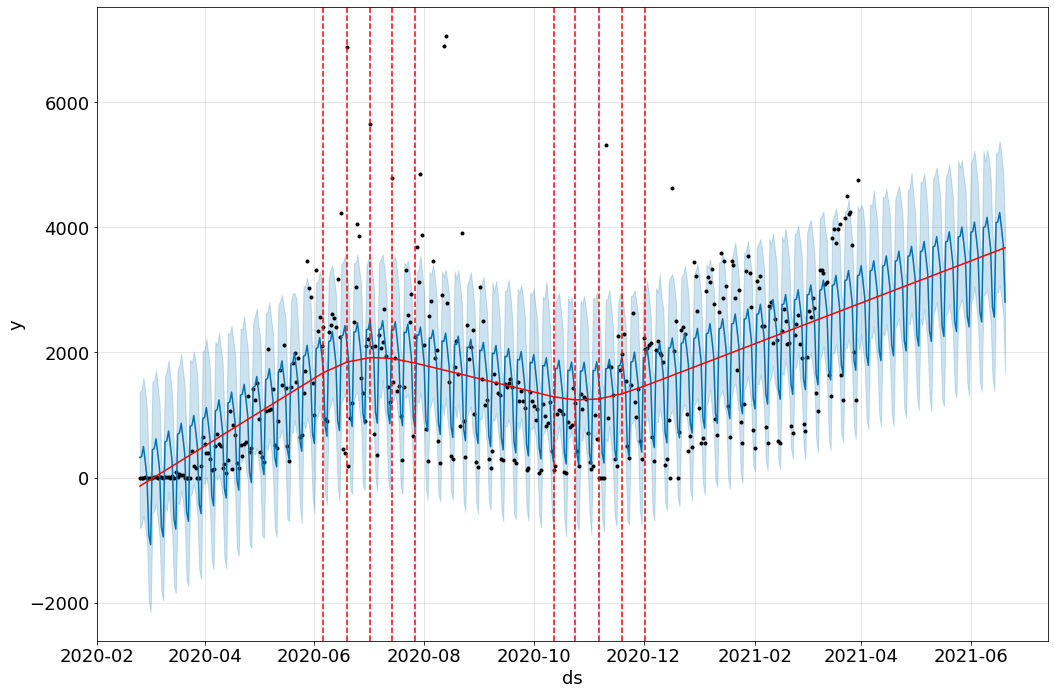

In [118]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [119]:
Prophet?

In [120]:
dados_sp

nome_munic  codigo_ibge  ...  obitos_novos_30d  obitos_novos_45d
0    São Paulo      3550308  ...               9.0              25.0
1    São Paulo      3550308  ...               9.0              13.0
2    São Paulo      3550308  ...               0.0              23.0
3    São Paulo      3550308  ...               0.0              11.0
4    São Paulo      3550308  ...              41.0              56.0
..         ...          ...  ...               ...               ...
478  São Paulo      3550308  ...               NaN               NaN
479  São Paulo      3550308  ...               NaN               NaN
480  São Paulo      3550308  ...               NaN               NaN
481  São Paulo      3550308  ...               NaN               NaN
482  São Paulo      3550308  ...               NaN               NaN

[483 rows x 37 columns]

In [121]:
modelo = Prophet(n_changepoints=50)

In [122]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [124]:
previsao = modelo.predict(dataframe_futuro)

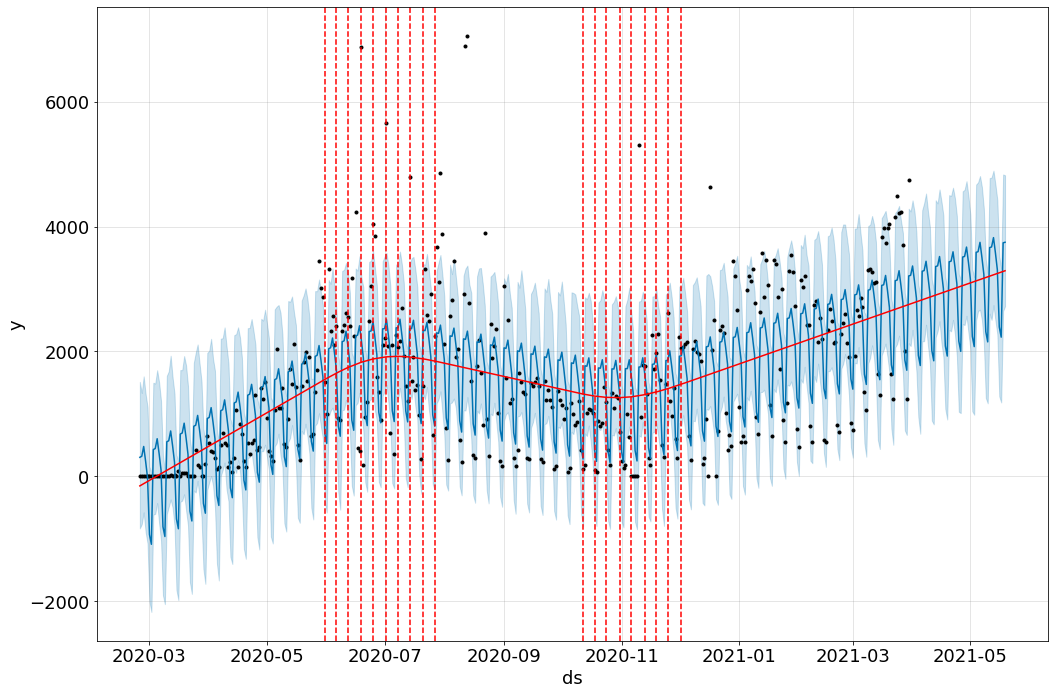

In [125]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [126]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)

In [127]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [128]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [129]:
previsao = modelo.predict(dataframe_futuro)

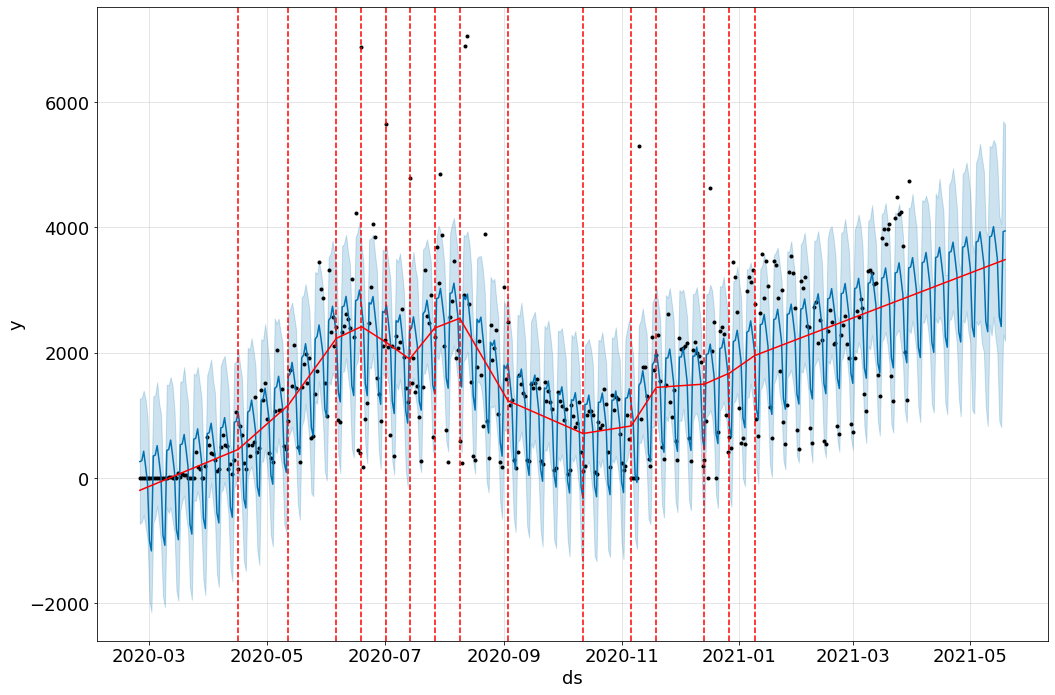

In [130]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [131]:
modelo.changepoints

13    2020-03-09
26    2020-03-22
38    2020-04-03
51    2020-04-16
64    2020-04-29
77    2020-05-12
89    2020-05-24
102   2020-06-06
115   2020-06-19
128   2020-07-02
140   2020-07-14
153   2020-07-27
166   2020-08-09
179   2020-08-22
191   2020-09-03
204   2020-09-16
217   2020-09-29
230   2020-10-12
242   2020-10-24
255   2020-11-06
268   2020-11-19
281   2020-12-02
293   2020-12-14
306   2020-12-27
319   2021-01-09
Name: ds, dtype: datetime64[ns]

In [132]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.005)

In [133]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [134]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [135]:
previsao = modelo.predict(dataframe_futuro)

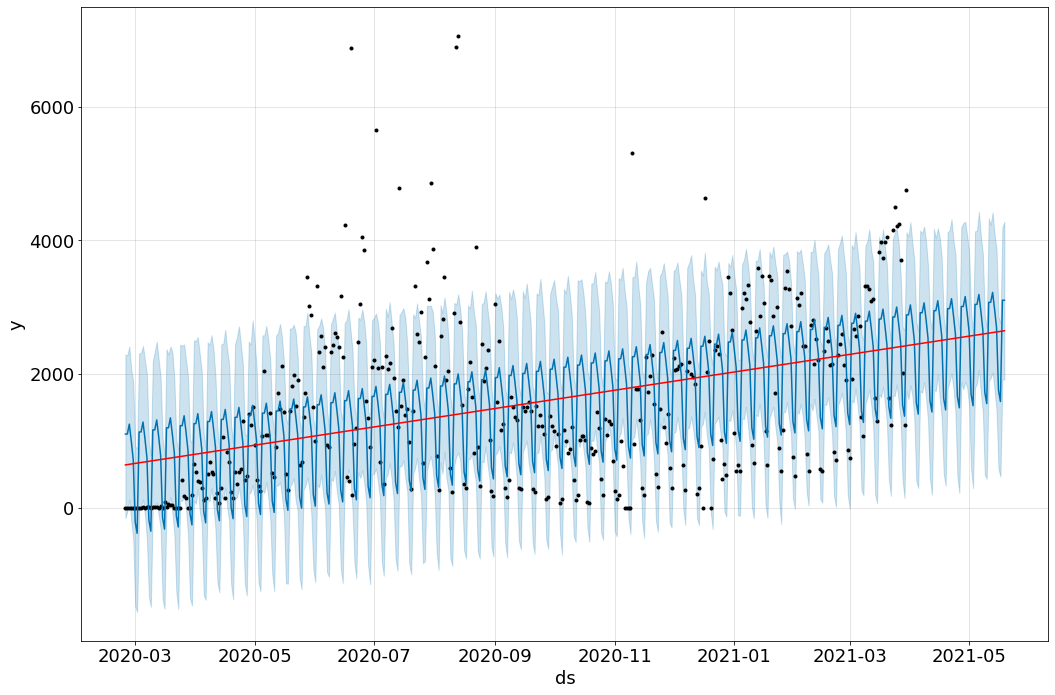

In [136]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [137]:
modelo = Prophet(changepoints=['2020-12-31'])

In [138]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [140]:
previsao = modelo.predict(dataframe_futuro)

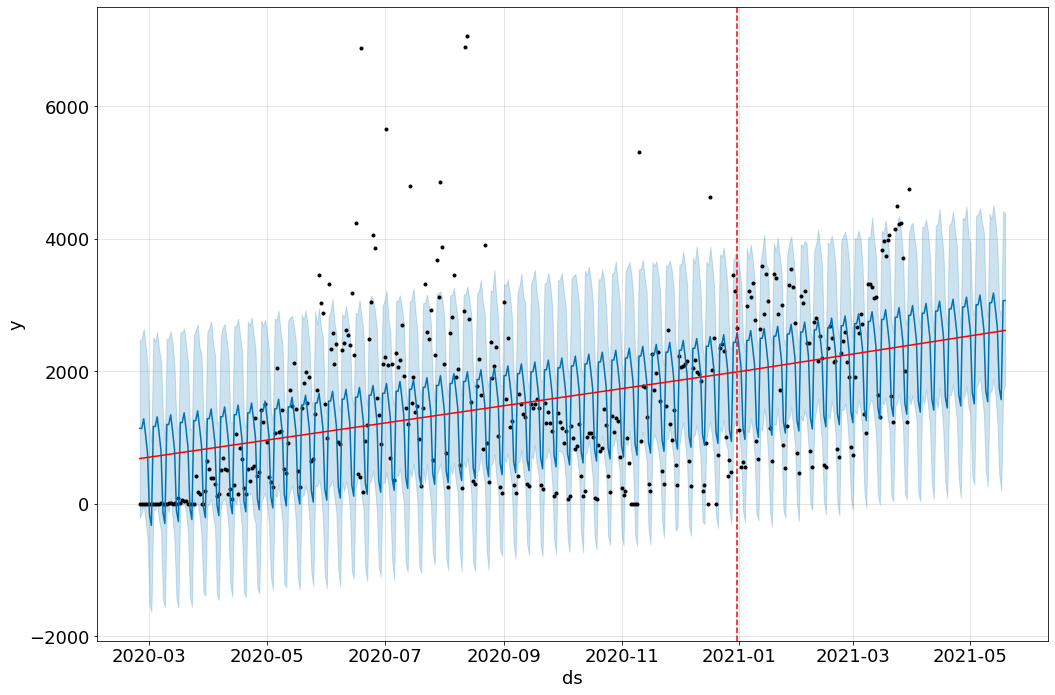

In [141]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 01 - Previsao para casos acumulados

In [142]:
dados_sp

nome_munic  codigo_ibge  ...  obitos_novos_30d  obitos_novos_45d
0    São Paulo      3550308  ...               9.0              25.0
1    São Paulo      3550308  ...               9.0              13.0
2    São Paulo      3550308  ...               0.0              23.0
3    São Paulo      3550308  ...               0.0              11.0
4    São Paulo      3550308  ...              41.0              56.0
..         ...          ...  ...               ...               ...
478  São Paulo      3550308  ...               NaN               NaN
479  São Paulo      3550308  ...               NaN               NaN
480  São Paulo      3550308  ...               NaN               NaN
481  São Paulo      3550308  ...               NaN               NaN
482  São Paulo      3550308  ...               NaN               NaN

[483 rows x 37 columns]

In [143]:
df = pd.DataFrame()

In [144]:
df['ds'] = dados_sp['datahora']

In [145]:
df['y'] = dados_sp['casos']

In [146]:
df['cap'] = 824500

In [147]:
modelo = Prophet(growth='logistic')

In [148]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [149]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [150]:
dataframe_futuro['cap'] = 824500

In [151]:
previsao = modelo.predict(dataframe_futuro)

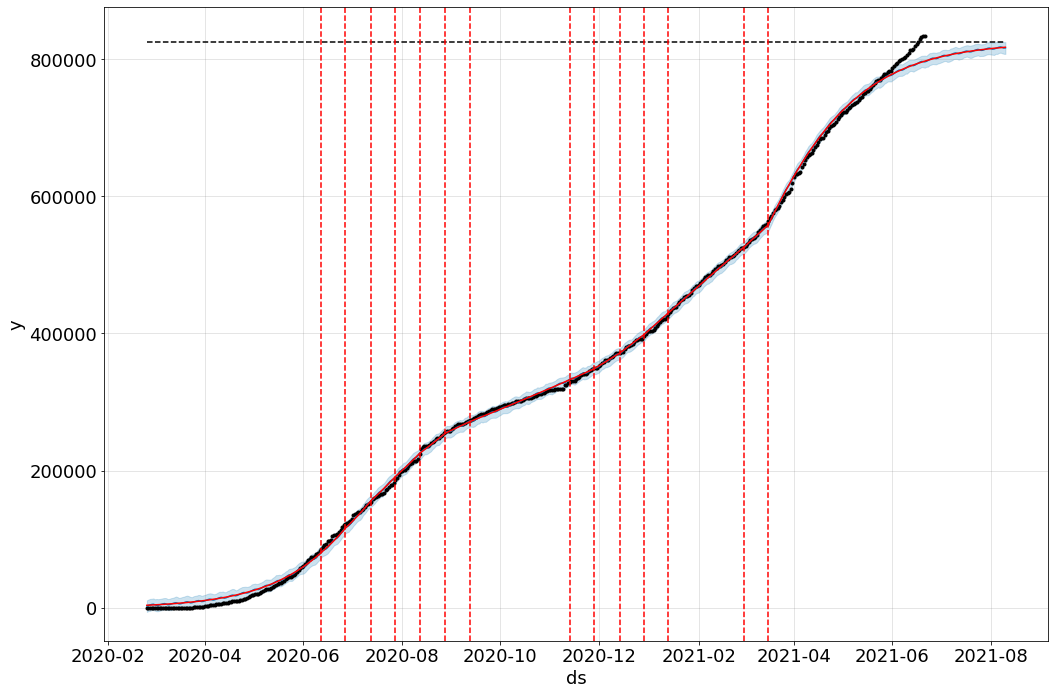

In [152]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 02 - Identificar potenciais change points utilizando o gráfico de barras

<BarContainer object of 483 artists>

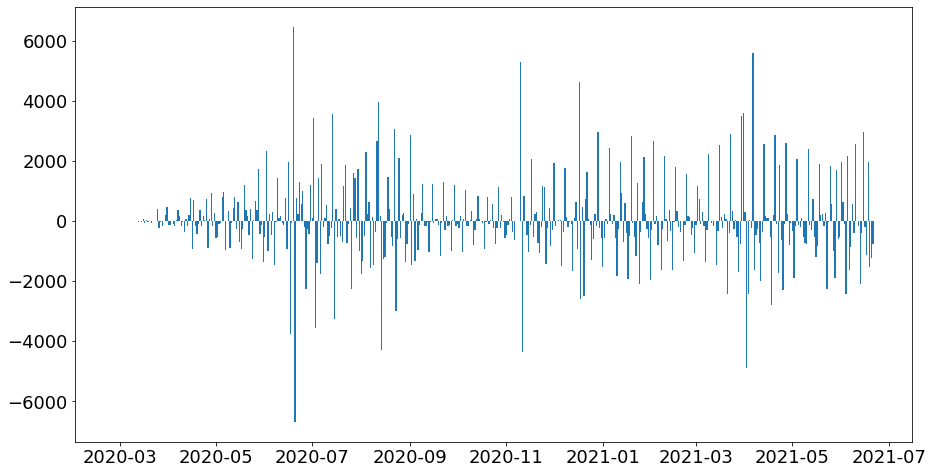

In [153]:
plt.bar(data=dados_sp, x='datahora', height='taxa_de_cresimento_casos')

In [154]:
# peaks, _ = find_peaks(dados_sp_2021['casos_novos'], distance=5) # find_peaks para encontrar os picos com distancia entre vizinhos de 5
# p = dados_sp_2021['casos_novos'][peaks] # guardando o indice dos picos 
# peaks_df = pd.DataFrame(p) # criando um Dataframe dos picos
# peaks_df.columns = ['picos_casos_novos'] # renomeando a coluna

In [155]:
peaks, _ = find_peaks(dados_sp['taxa_de_cresimento_casos'], distance=5)

In [156]:
p = dados_sp['taxa_de_cresimento_casos'][peaks]

In [157]:
peaks_df = pd.DataFrame(p)

In [158]:
peaks_df.columns = ['picos_taxa_crescimento_casos_novos']

In [159]:
dados_sp = pd.concat([dados_sp, peaks_df], axis=1)

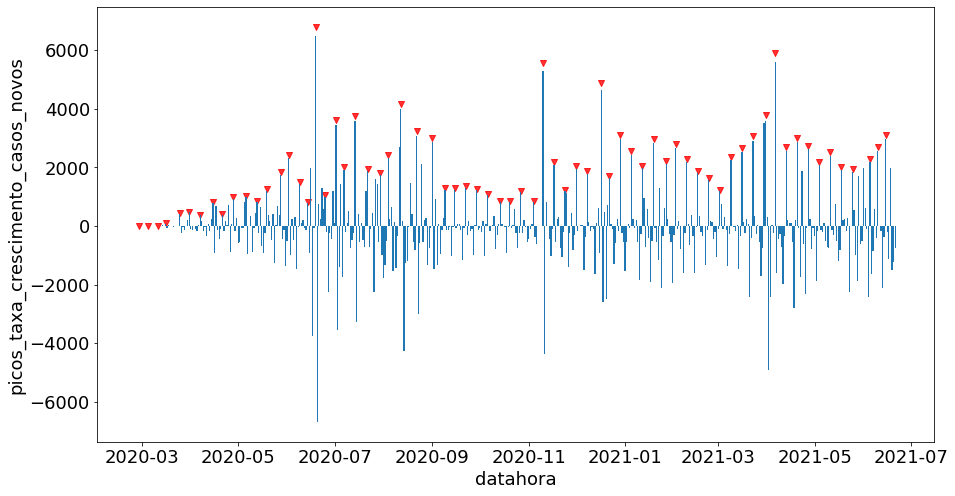

In [160]:
plt.bar(data=dados_sp, x='datahora', height='taxa_de_cresimento_casos')
sns.regplot(x=dados_sp["datahora"], y=dados_sp["picos_taxa_crescimento_casos_novos"]*1.05, marker="v", fit_reg=False, color='red')

In [161]:
l = list(dados_sp['picos_taxa_crescimento_casos_novos'].dropna())

In [162]:
change_points = list(dados_sp.query('picos_taxa_crescimento_casos_novos == @l')['datahora'])

In [163]:
df = pd.DataFrame()

In [164]:
df['ds'] = dados_sp['datahora']

In [165]:
df['y'] = dados_sp['casos_novos']

In [185]:
modelo = Prophet(changepoints=change_points, changepoint_range=0.9)

In [167]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [168]:
dataframe_futuro = modelo.make_future_dataframe(periods=50)

In [169]:
previsao = modelo.predict(dataframe_futuro)

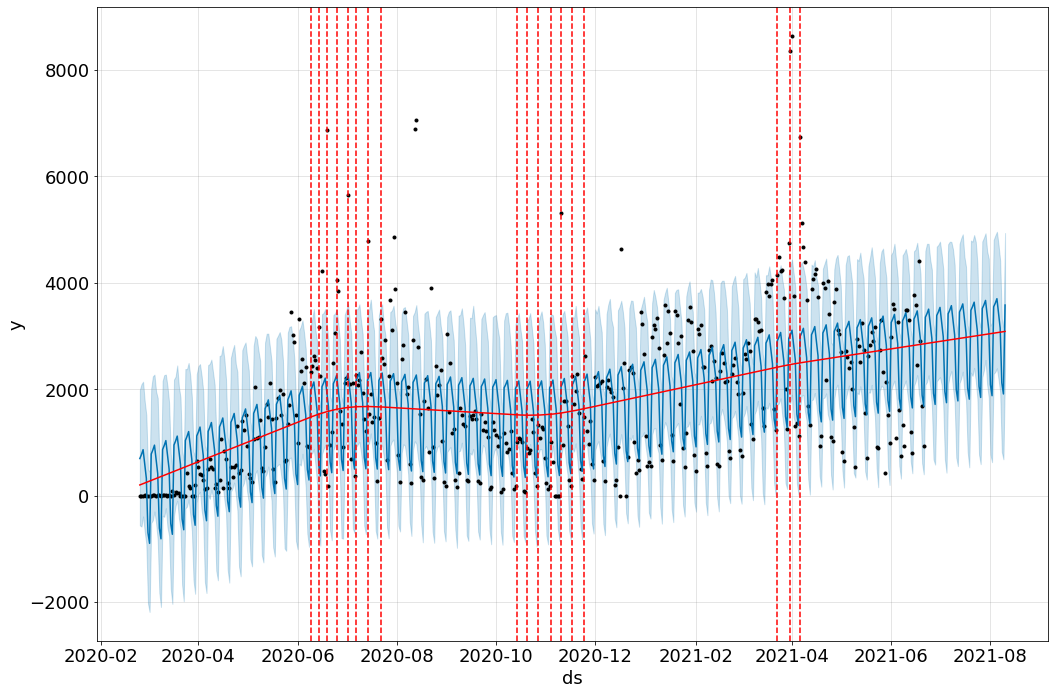

In [170]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 03 - função para rodar o modelo automaticamente

In [189]:
def rodar_prophet():
  df = pd.DataFrame()
  df['ds'] = dados_sp['datahora']
  df['y'] = dados_sp['casos_novos']

  modelo = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99)
  modelo.fit(df)
  dataframe_futuro = modelo.make_future_dataframe(periods=82)
  previsao = modelo.predict(dataframe_futuro)

  fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
  a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


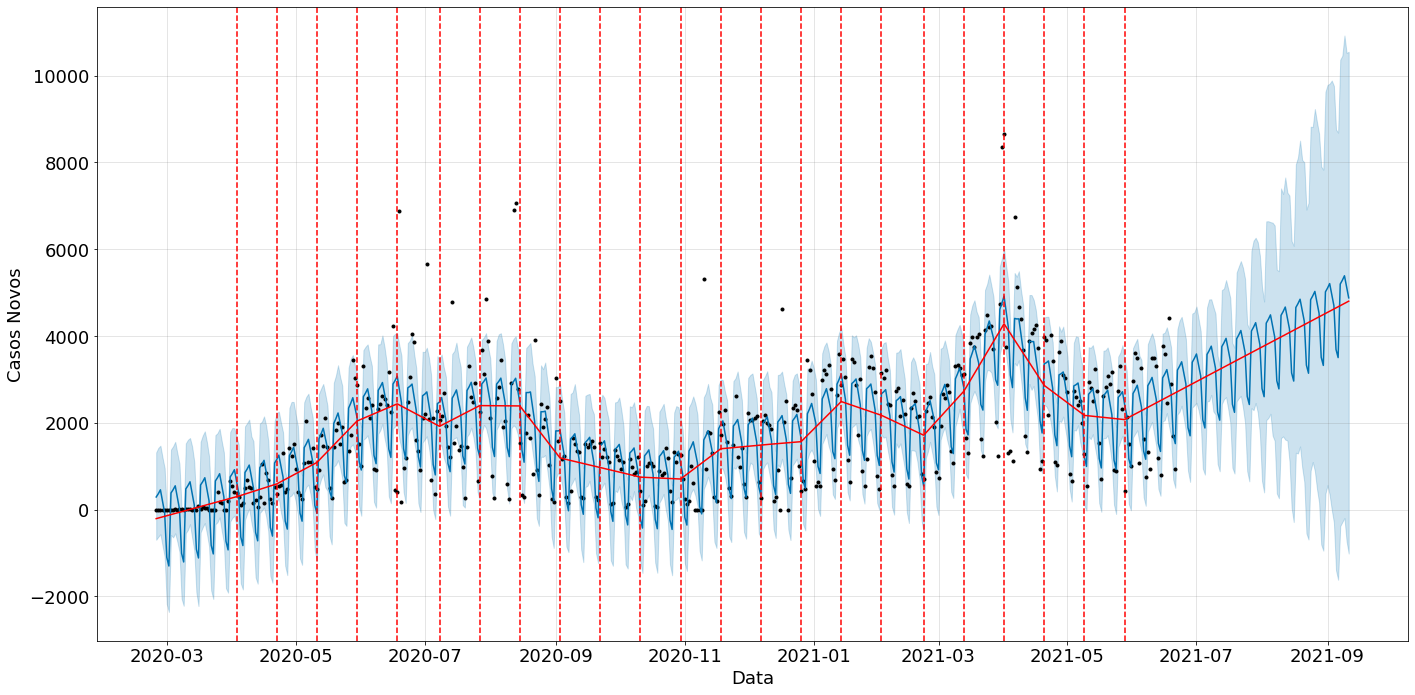

In [190]:
rodar_prophet()

# Aula 04 - Feriados e sazonalidades nas séries temporais

In [201]:
dados_202101.head()

nome_munic  codigo_ibge  dia  ...   ano media_movel_casos  media_movel_obitos
311  São Paulo      3550308    1  ...  2021       1714.428571           35.142857
312  São Paulo      3550308    2  ...  2021       1733.000000           37.142857
313  São Paulo      3550308    3  ...  2021       1729.714286           37.428571
314  São Paulo      3550308    4  ...  2021       1739.285714           38.000000
315  São Paulo      3550308    5  ...  2021       1673.000000           42.142857

[5 rows x 31 columns]

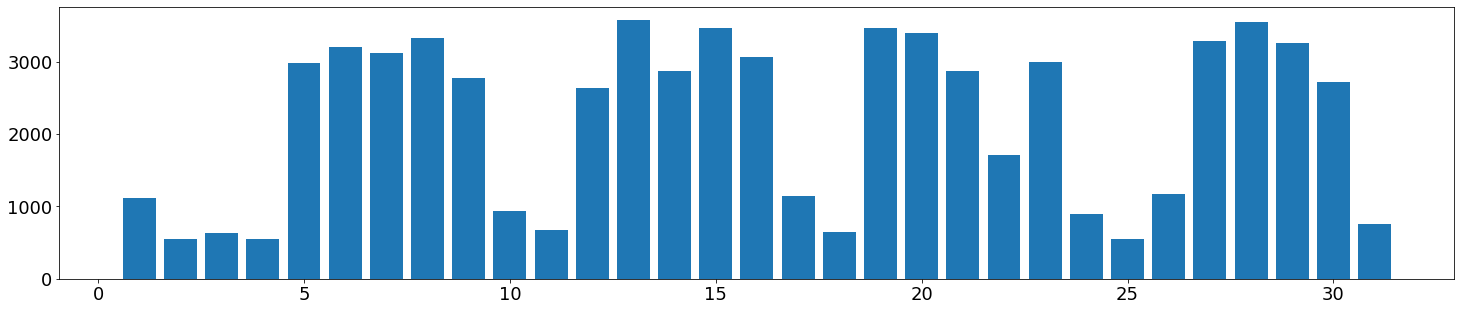

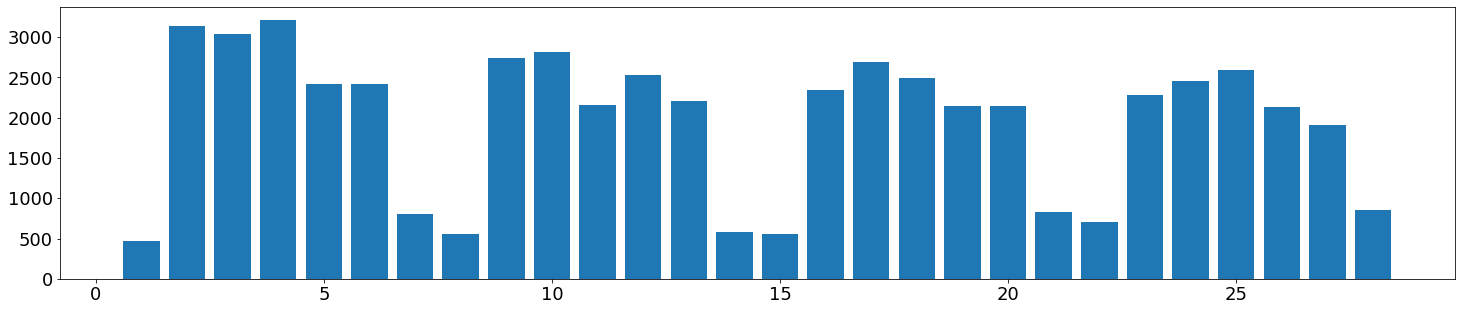

In [202]:
plt.figure(figsize=(25,5))
plt.bar(data=dados_202101, x='dia', height='casos_novos');

plt.figure(figsize=(25,5))
plt.bar(data=dados_202102, x='dia', height='casos_novos');

In [203]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora']
df['y'] = dados_sp['casos_novos']

In [204]:
modelo = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99)

In [205]:
modelo.add_country_holidays(country_name='BR')

In [206]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
dataframe_futuro = modelo.make_future_dataframe(periods=82)

In [208]:
previsao = modelo.predict(dataframe_futuro)

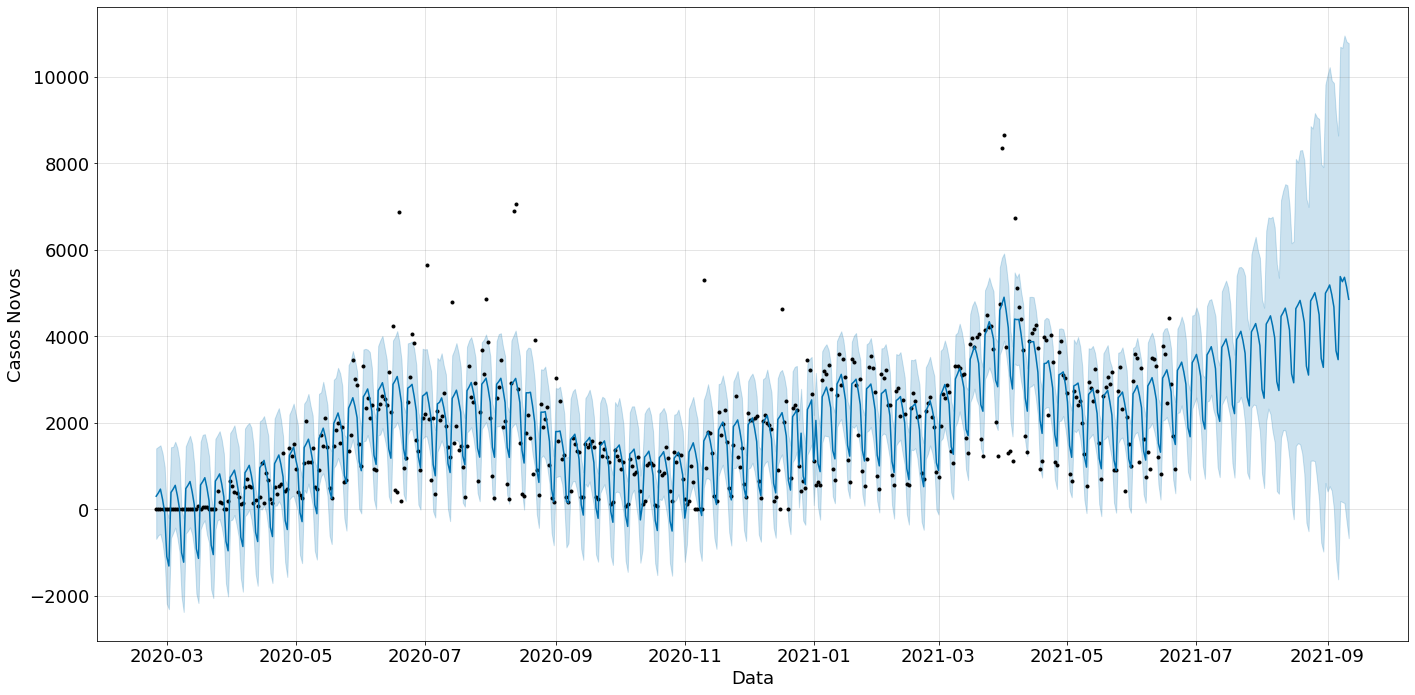

In [209]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

In [210]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

In [211]:
feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [212]:
feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020',
                                 'ds': pd.to_datetime(feriados_sp_2020)})

In [213]:
feriados_sp_2020.head()

holiday         ds
0  sp_2020 2020-02-25
1  sp_2020 2020-02-26
2  sp_2020 2020-04-10
3  sp_2020 2020-04-21
4  sp_2020 2020-05-01

In [214]:
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021',
                                 'ds': pd.to_datetime(feriados_sp_2021)})

In [215]:
feriados_sp_2021.head()

holiday         ds
0  sp_2021 2020-01-01
1  sp_2021 2020-01-25
2  sp_2021 2020-02-15
3  sp_2021 2020-02-16
4  sp_2021 2020-02-17

In [216]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))
feriados.reset_index(inplace=True)
feriados.drop('index', axis=1, inplace=True)

In [217]:
modelo_feriados = Prophet(changepoint_prior_scale=15.0, holidays=feriados, changepoint_range=0.99)

In [218]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [219]:
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)

In [220]:
previsao = modelo_feriados.predict(dataframe_futuro)

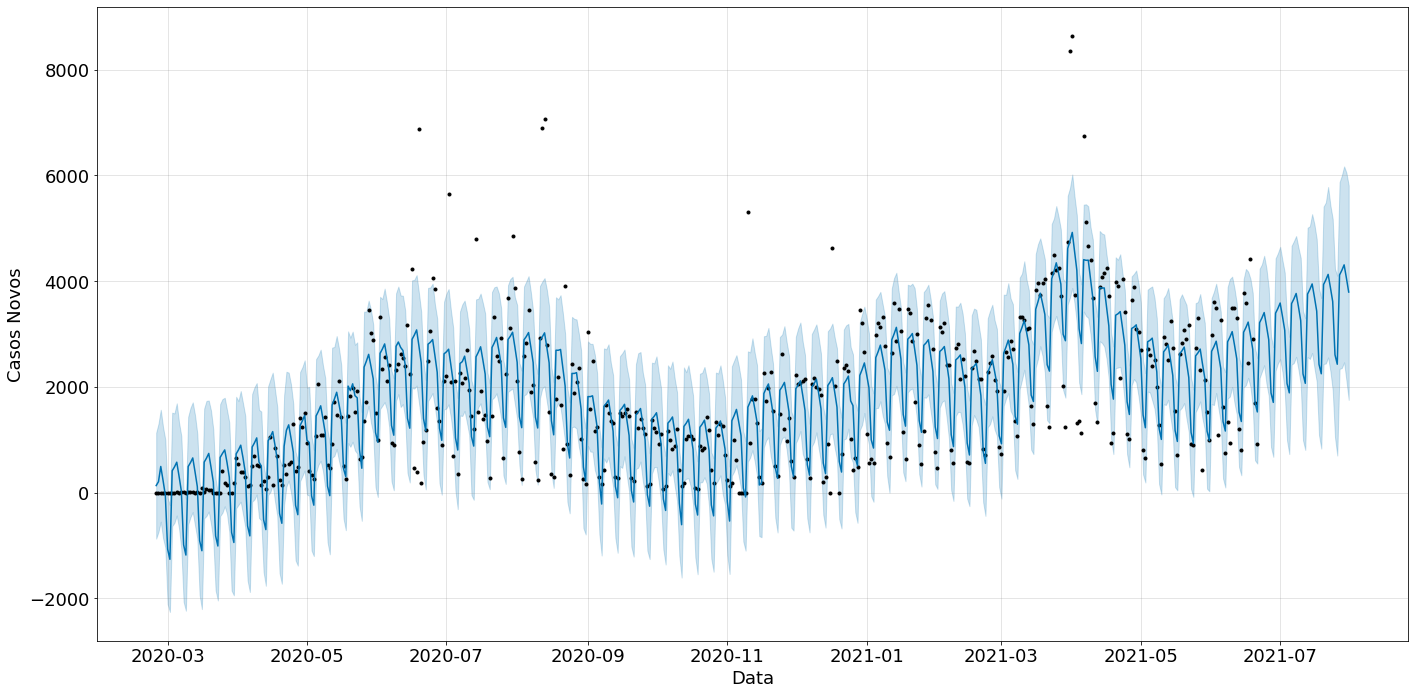

In [221]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

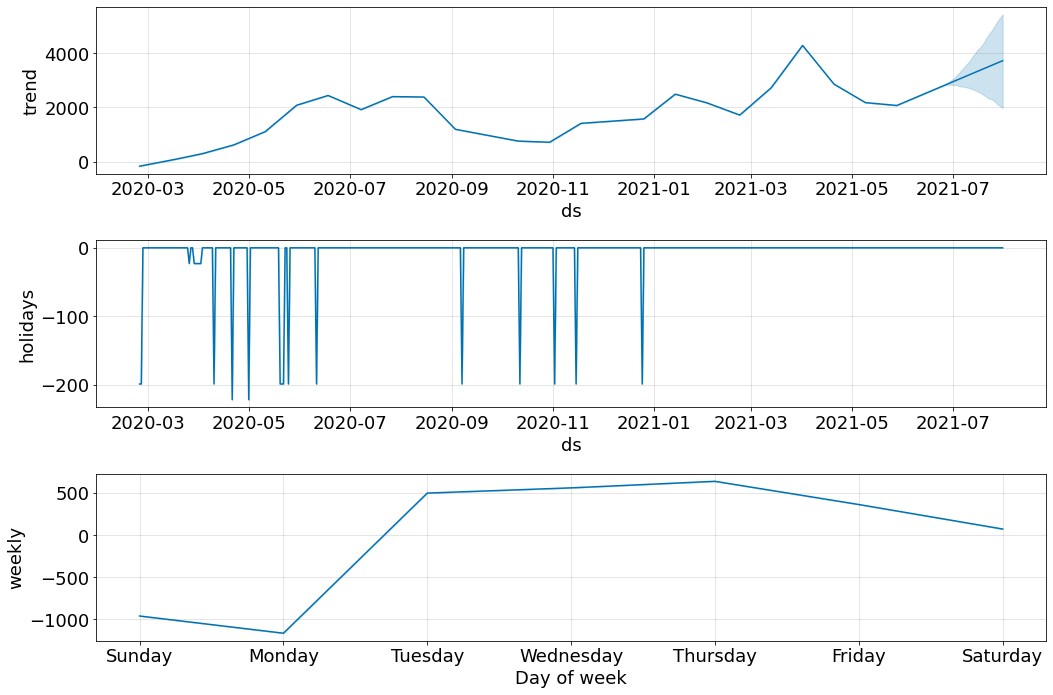

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [223]:
from sklearn.metrics import mean_absolute_error

*Sazonalidade aditiva*

In [224]:
mean_absolute_error(df['y'], previsao['yhat'][:483])

542.8633776015838

*Sazonalidade multiplicativa*

In [225]:
modelo_feriados = Prophet(changepoint_prior_scale=15.0, holidays=feriados, changepoint_range=0.99, seasonality_mode='multiplicative')

In [226]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [227]:
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)

In [228]:
previsao = modelo_feriados.predict(dataframe_futuro)

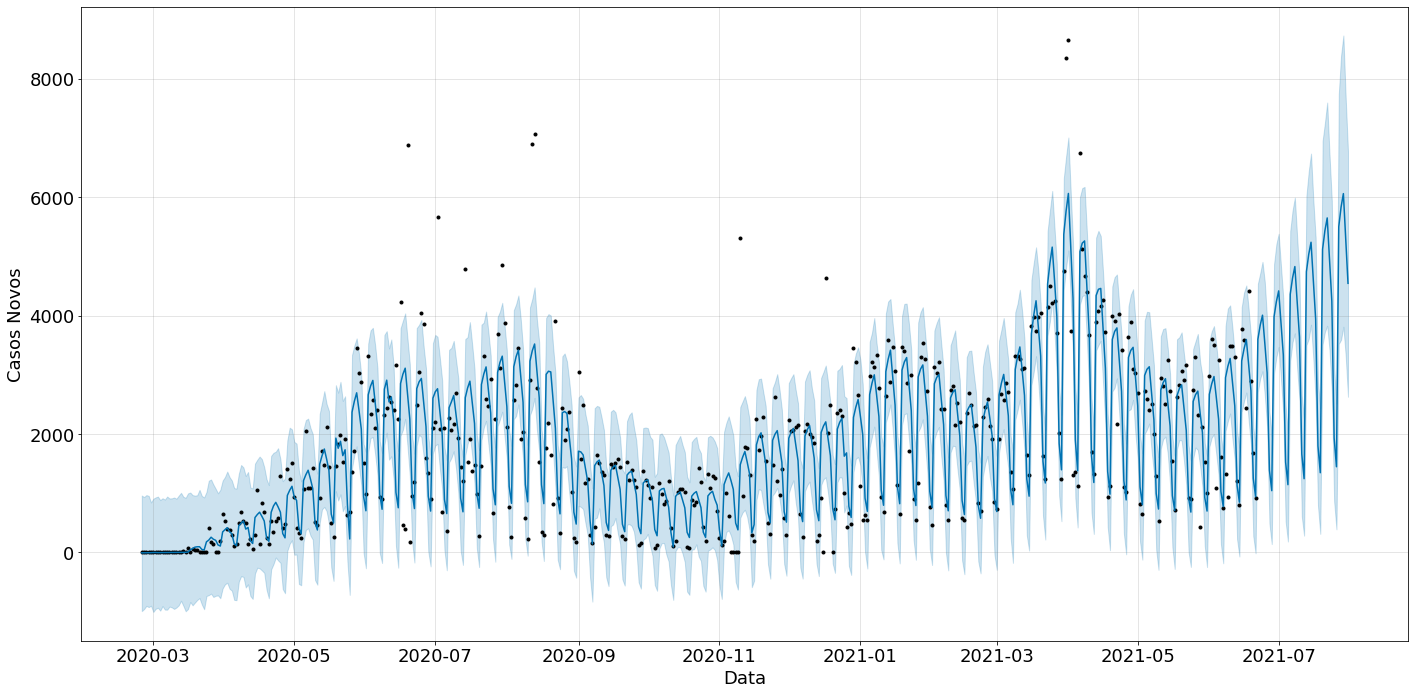

In [229]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

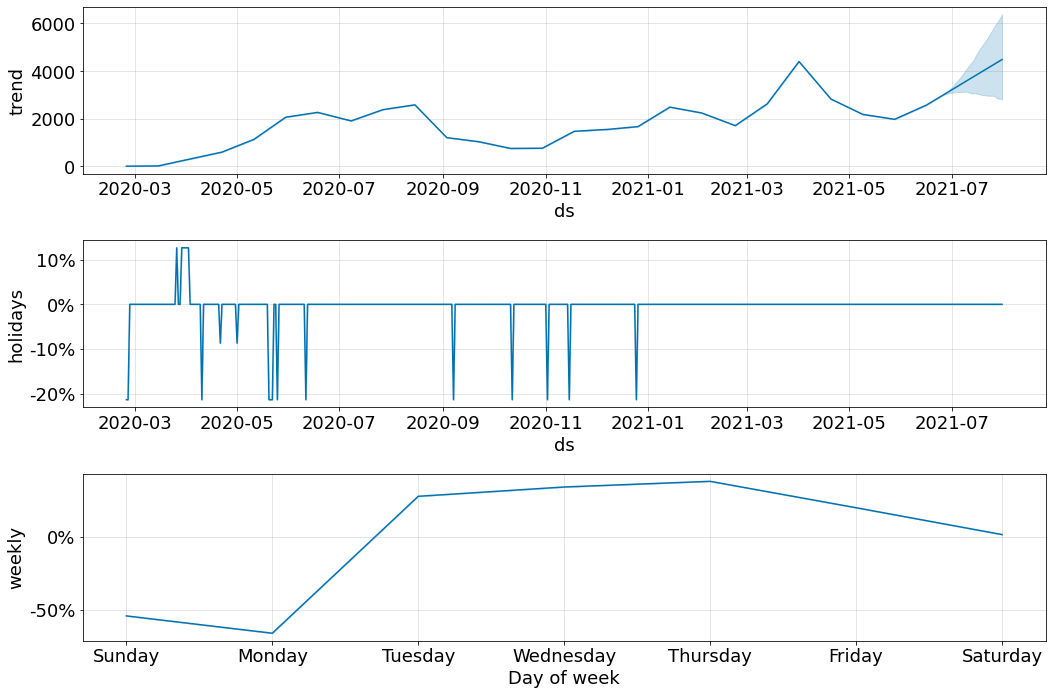

In [230]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [231]:
mean_absolute_error(df['y'], previsao['yhat'][:483])

437.72013841768137

## Desafio 01 - plotar o gráfico de linhas junto para verificar o alinhamento do modelo aos dados reais

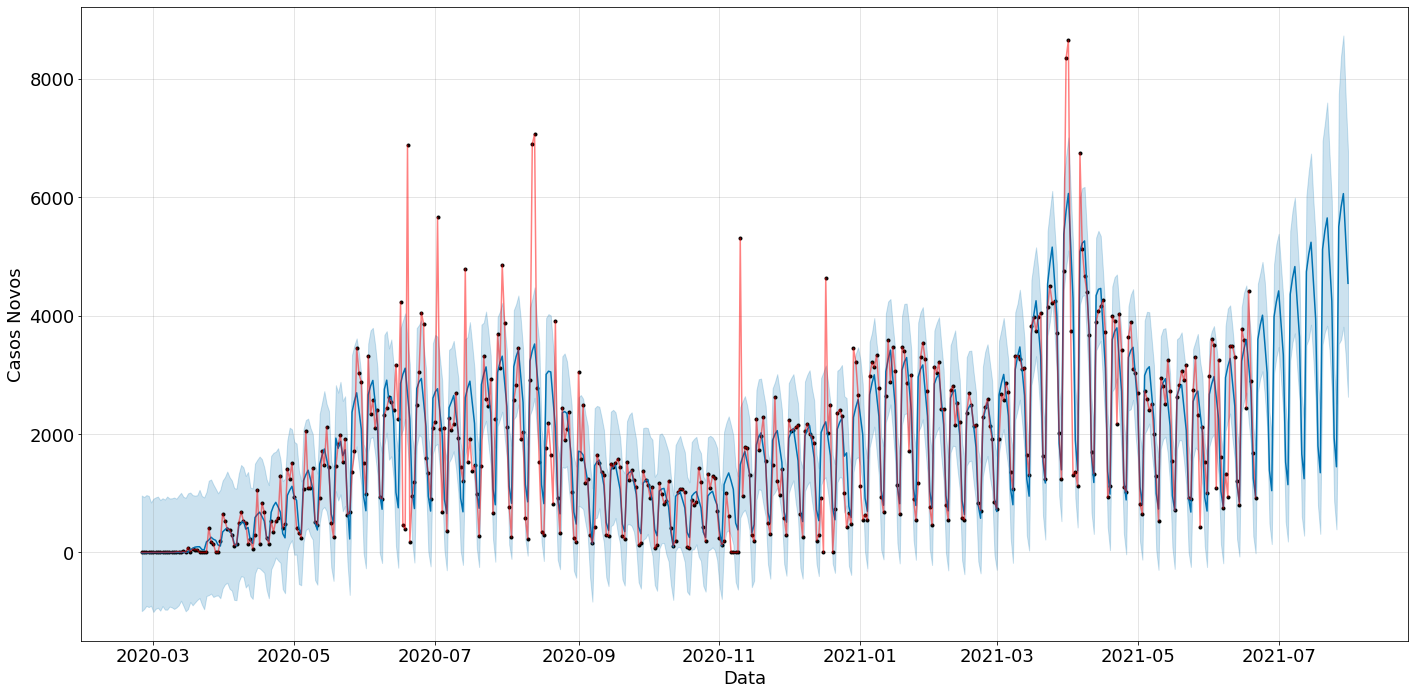

In [232]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
sns.lineplot(data=df, x='ds', y='y', color='r', alpha=.5)

# Aula 05 - Outliers e intervalo de confiança

In [245]:
dados_sp.shape

(483, 38)

In [249]:
df = pd.DataFrame()

In [250]:
df['ds'] = dados_sp['datahora']

In [251]:
df['y'] = dados_sp['casos_novos']

In [254]:
modelo = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=15.0, changepoint_range=0.99)

In [255]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [256]:
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)

In [257]:
previsao = modelo.predict(dataframe_futuro)

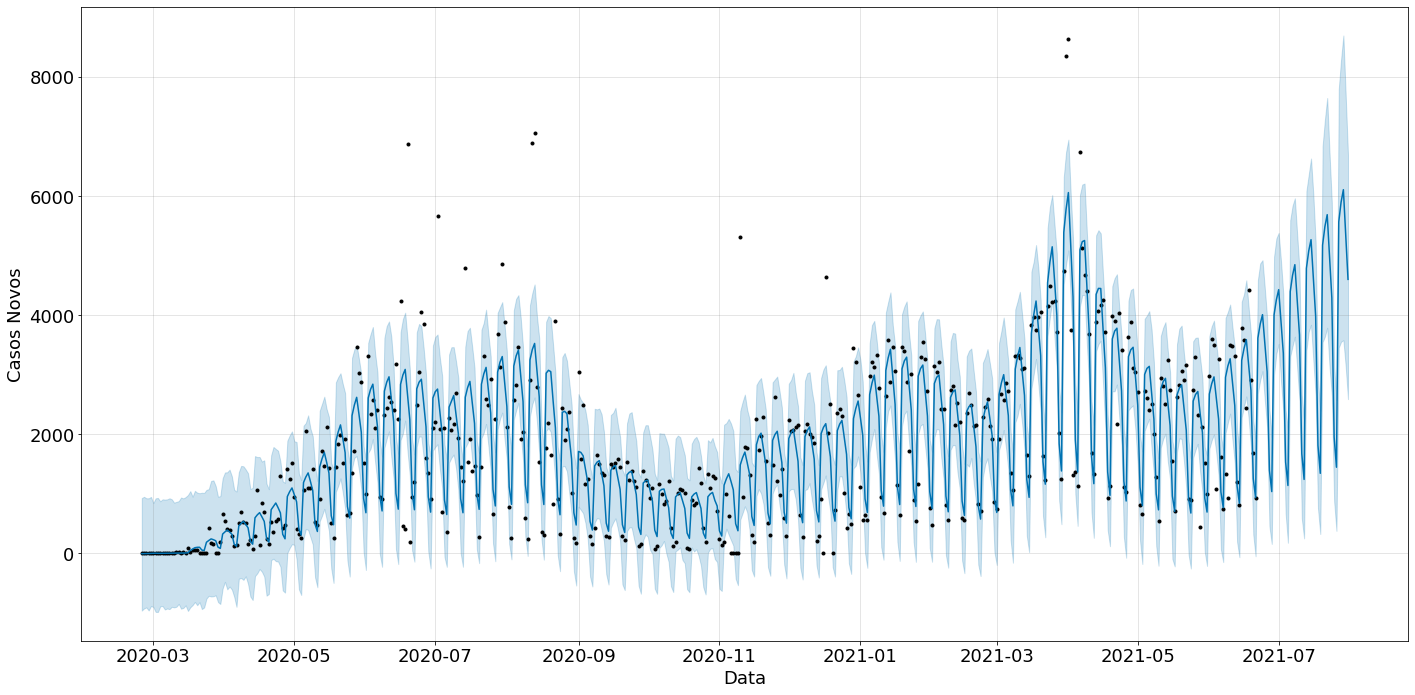

In [258]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

In [267]:
sem_outliers = df[(df['y'] > previsao['yhat_lower'][:483]) & (df['y'] < previsao['yhat_upper'][:483])]

In [268]:
sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
476 2021-06-15  3776
477 2021-06-16  3580
480 2021-06-19  2900
481 2021-06-20  1686
482 2021-06-21   926

[424 rows x 2 columns]

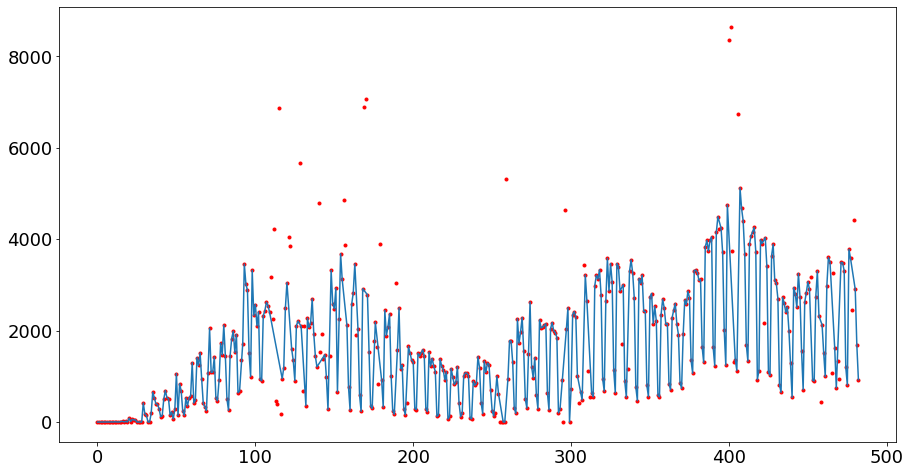

In [270]:
plt.plot(df.index, df['y'], '.r')
plt.plot(sem_outliers.index, sem_outliers['y'])

In [271]:
sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
476 2021-06-15  3776
477 2021-06-16  3580
480 2021-06-19  2900
481 2021-06-20  1686
482 2021-06-21   926

[424 rows x 2 columns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


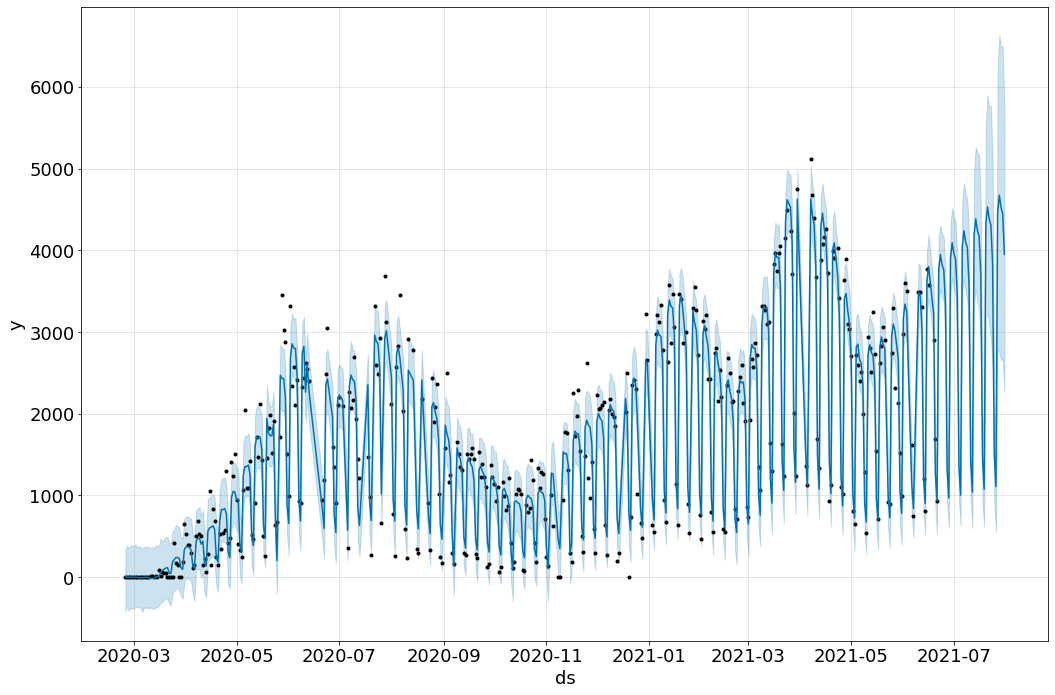

In [274]:
modelo_feriados = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, seasonality_mode='multiplicative', holidays=feriados)
modelo_feriados.fit(sem_outliers)
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)
previsao = modelo_feriados.predict(dataframe_futuro)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

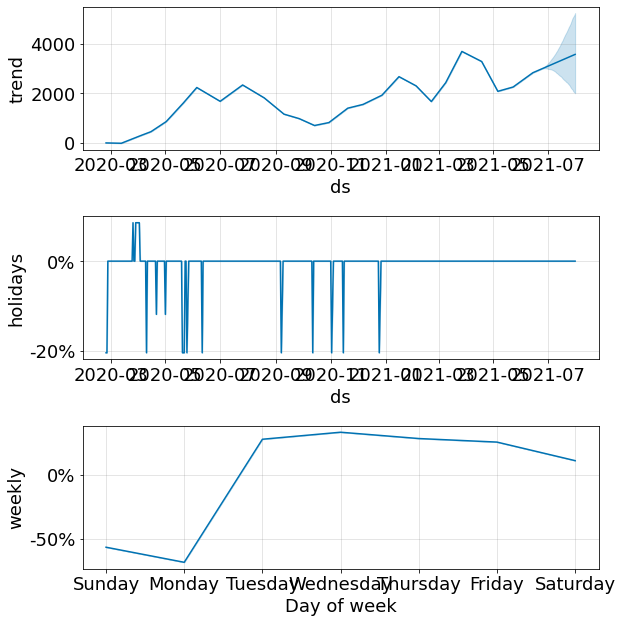

In [281]:
plt.figure(figsize=(15,10))
modelo_feriados.plot_components(previsao);

In [282]:
amostras = modelo_feriados.predictive_samples(previsao)

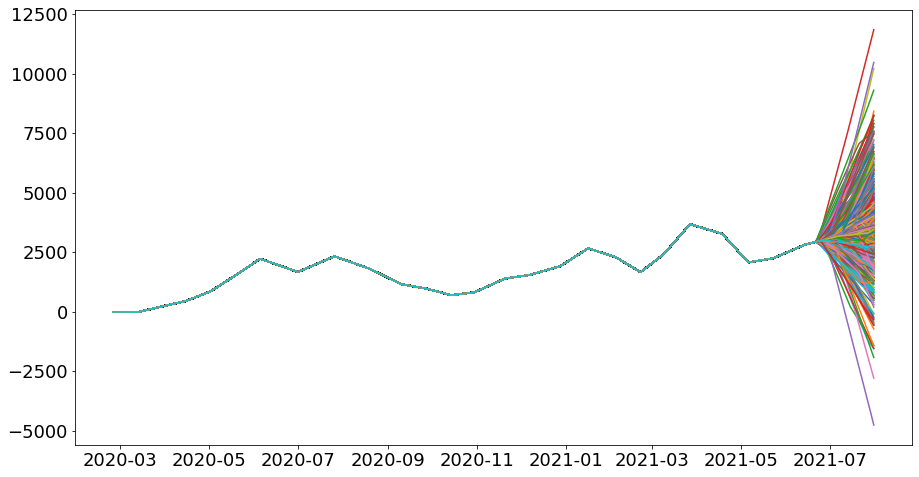

In [283]:
plt.plot(previsao['ds'], amostras['trend']);

## Desafio 01 - Mexer nos intervalos de confiança

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


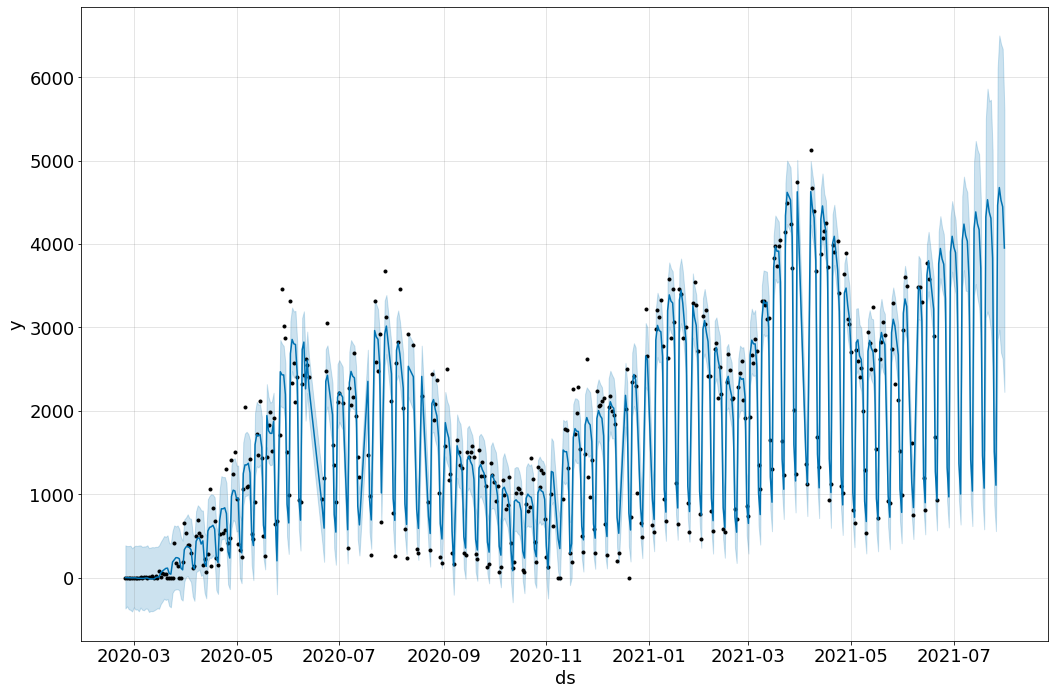

In [284]:
modelo_feriados = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, seasonality_mode='multiplicative', holidays=feriados)
modelo_feriados.fit(sem_outliers)
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)
previsao = modelo_feriados.predict(dataframe_futuro)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


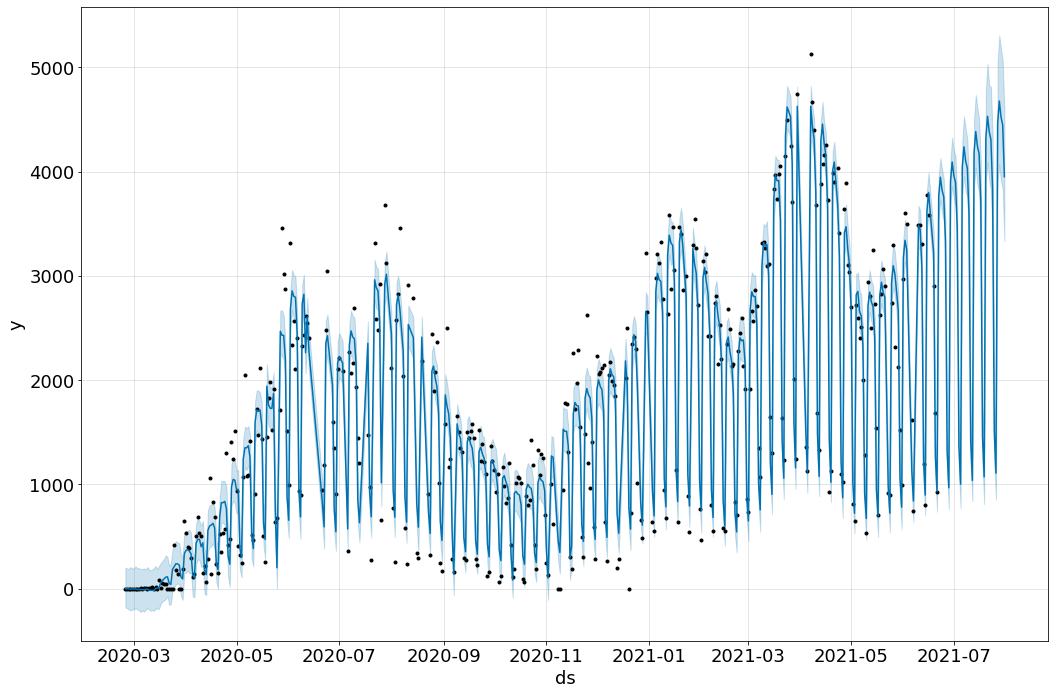

In [295]:
modelo_feriados = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, seasonality_mode='multiplicative', holidays=feriados, interval_width=0.5)
modelo_feriados.fit(sem_outliers)
dataframe_futuro = modelo_feriados.make_future_dataframe(periods=40)
previsao = modelo_feriados.predict(dataframe_futuro)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

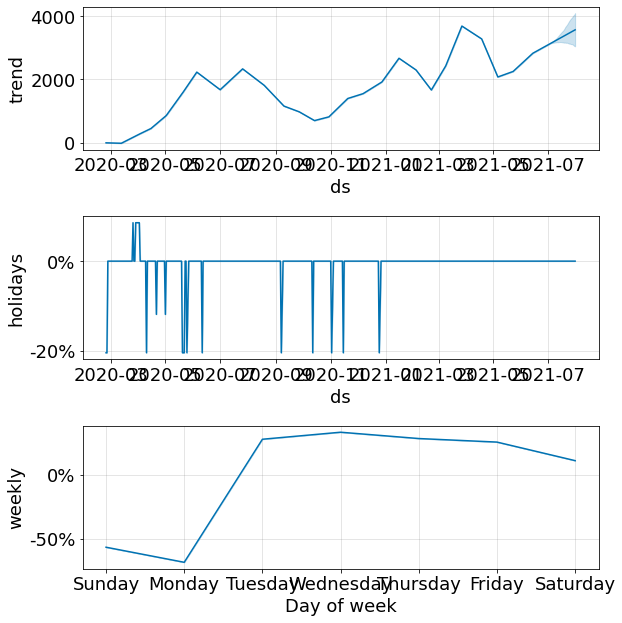

In [296]:
modelo_feriados.plot_components(previsao);

In [302]:
mean_absolute_error(df['y'][:464], previsao['yhat'][:483])

1129.3687582193152

# Teste

*Tentando determinar onde estão os picos utilizando o teste t-student*

In [ ]:
# dados_sp_2021.head()

In [ ]:
# g = []
# for x in list(dados_sp_2021['casos_novos'].rolling(window=7, center=False)):
#   g.append(list(x))


In [ ]:
# pvalue = []
# i=7
# f=15
# for x in g:
#   a = stats.ttest_1samp(a = x, popmean = dados_sp_2021['casos_novos'][i:f].mean()).pvalue * 100
#   pvalue.append(a)
#   i =+7 
#   f+= 7

In [ ]:
# dados_sp_2021['pvalue_casos_novos'] = pvalue

In [ ]:
# dados_sp_2021

In [ ]:
# def sig(pvalue: float):
#   if pvalue >= 10:
#     return 1
#   else:
#     return 0


In [ ]:
# dados_sp_2021['pvalue_casos_novos'] = dados_sp_2021['pvalue_casos_novos'].map(sig)

In [ ]:
# dados_sp_2021.head()

In [ ]:
# pvalue

*fim da tentativa*